# 第7章: 単語ベクトル
言語処理100本ノック (https://nlp100.github.io/ja/) の第7章です。

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [2]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

In [3]:
model["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [7]:
import numpy as np

sim = np.sum(model["United_States"] * model["U.S."]) / (np.linalg.norm(model["United_States"]) * np.linalg.norm(model["U.S."]))
print(sim)

0.7310775


## 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [11]:
model.most_similar(positive=["Spain", "Athens"], negative=["Madrid"])

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.5606849193572998),
 ('Ioannis_Drymonakos', 0.555290937423706),
 ('Greeks', 0.5450686812400818),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759141921997),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

## 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [14]:
with open("questions-words.txt", "r") as f:
    lines = f.readlines()
    
print(lines[:10])

[': capital-common-countries\n', 'Athens Greece Baghdad Iraq\n', 'Athens Greece Bangkok Thailand\n', 'Athens Greece Beijing China\n', 'Athens Greece Berlin Germany\n', 'Athens Greece Bern Switzerland\n', 'Athens Greece Cairo Egypt\n', 'Athens Greece Canberra Australia\n', 'Athens Greece Hanoi Vietnam\n', 'Athens Greece Havana Cuba\n']


In [15]:
lines = [l.rstrip("\n") for l in lines]
print(lines[:10])

[': capital-common-countries', 'Athens Greece Baghdad Iraq', 'Athens Greece Bangkok Thailand', 'Athens Greece Beijing China', 'Athens Greece Berlin Germany', 'Athens Greece Bern Switzerland', 'Athens Greece Cairo Egypt', 'Athens Greece Canberra Australia', 'Athens Greece Hanoi Vietnam', 'Athens Greece Havana Cuba']


In [18]:
for l in lines:
    l_list = l.split(" ")
    if ":" == l_list[0]:
        continue
    w_list = model.most_similar(positive=[l_list[1], l_list[2]], negative=[l_list[0]], topn=1)
    w = w_list[0]
    word = w[0]
    score = w[1]
    print(f"{l_list[1]} - {l_list[0]} + {l_list[2]}, {word}, {score}")

Greece - Athens + Baghdad, Iraqi, 0.6351871490478516
Greece - Athens + Bangkok, Thailand, 0.7137669324874878
Greece - Athens + Beijing, China, 0.7235777974128723
Greece - Athens + Berlin, Germany, 0.6734622716903687
Greece - Athens + Bern, Switzerland, 0.4919748306274414
Greece - Athens + Cairo, Egypt, 0.7527809739112854
Greece - Athens + Canberra, Australia, 0.583732545375824
Greece - Athens + Hanoi, Viet_Nam, 0.6276341676712036
Greece - Athens + Havana, Cuba, 0.6460991501808167
Greece - Athens + Helsinki, Finland, 0.6899983286857605
Greece - Athens + Islamabad, Pakistan, 0.7233326435089111
Greece - Athens + Kabul, Afghan, 0.6160915493965149
Greece - Athens + London, Britain, 0.5646188259124756
Greece - Athens + Madrid, Spain, 0.703661322593689
Greece - Athens + Moscow, Russia, 0.7382972240447998
Greece - Athens + Oslo, Norway, 0.6470743417739868
Greece - Athens + Ottawa, Canada, 0.5912168622016907
Greece - Athens + Paris, France, 0.6724624037742615
Greece - Athens + Rome, Italy, 0.68

Egypt - Cairo + Berlin, Germany, 0.7016904950141907
Egypt - Cairo + Bern, Switzerland, 0.4930408000946045
Australia - Canberra + Hanoi, Viet_Nam, 0.6714490652084351
Australia - Canberra + Havana, Cuba, 0.6964417695999146
Australia - Canberra + Helsinki, Finland, 0.690654993057251
Australia - Canberra + Islamabad, Pakistan, 0.7743955254554749
Australia - Canberra + Kabul, Afghans, 0.585472047328949
Australia - Canberra + London, UK, 0.6224532127380371
Australia - Canberra + Madrid, Spain, 0.7410275936126709
Australia - Canberra + Moscow, Russia, 0.7891086339950562
Australia - Canberra + Oslo, Norway, 0.670374870300293
Australia - Canberra + Ottawa, Canada, 0.7492120265960693
Australia - Canberra + Paris, France, 0.7159996628761292
Australia - Canberra + Rome, Italy, 0.663947343826294
Australia - Canberra + Stockholm, Sweden, 0.7069720029830933
Australia - Canberra + Tehran, Iran, 0.7551095485687256
Australia - Canberra + Tokyo, Japan, 0.7584798336029053
Australia - Canberra + Athens, Gr

England - London + Bern, Hanover, 0.45303672552108765
England - London + Cairo, Egypt, 0.5641492605209351
England - London + Canberra, Australia, 0.6054890155792236
England - London + Hanoi, Viet_Nam, 0.5810423493385315
England - London + Havana, Cuba, 0.5627489686012268
England - London + Helsinki, Finland, 0.621544599533081
England - London + Islamabad, Pakistan, 0.6654638051986694
England - London + Kabul, Afghan, 0.573311984539032
Spain - Madrid + Moscow, Russia, 0.8136780858039856
Spain - Madrid + Oslo, Norway, 0.7230186462402344
Spain - Madrid + Ottawa, Canada, 0.6814807653427124
Spain - Madrid + Paris, France, 0.7609949111938477
Spain - Madrid + Rome, Italy, 0.7004686594009399
Spain - Madrid + Stockholm, Sweden, 0.7822341918945312
Spain - Madrid + Tehran, Iran, 0.7588754892349243
Spain - Madrid + Tokyo, Japan, 0.8010954856872559
Spain - Madrid + Athens, Greece, 0.6898480653762817
Spain - Madrid + Baghdad, Mosul, 0.657950222492218
Spain - Madrid + Bangkok, Thailand, 0.77013802528

Sweden - Stockholm + Madrid, Spain, 0.7796703577041626
Sweden - Stockholm + Moscow, Russia, 0.8211641311645508
Sweden - Stockholm + Oslo, Norway, 0.794228196144104
Sweden - Stockholm + Ottawa, Canada, 0.678627610206604
Sweden - Stockholm + Paris, France, 0.7826051712036133
Sweden - Stockholm + Rome, Italy, 0.7247942686080933
Iran - Tehran + Tokyo, Japan, 0.7860098481178284
Iran - Tehran + Athens, Greece, 0.6574969291687012
Iran - Tehran + Baghdad, Iraq, 0.775810718536377
Iran - Tehran + Bangkok, Thailand, 0.8036007881164551
Iran - Tehran + Beijing, China, 0.8198246359825134
Iran - Tehran + Berlin, Germany, 0.6948081254959106
Iran - Tehran + Bern, coach_Bobby_Curlings, 0.5130249857902527
Iran - Tehran + Cairo, Egypt, 0.8029148578643799
Iran - Tehran + Canberra, Australia, 0.7018479108810425
Iran - Tehran + Hanoi, Viet_Nam, 0.7534171342849731
Iran - Tehran + Havana, Cuba, 0.8335038423538208
Iran - Tehran + Helsinki, Finland, 0.695157527923584
Iran - Tehran + Islamabad, Pakistan, 0.847893

Algeria - Algiers + Budapest, Hungary, 0.7044358253479004
Algeria - Algiers + Bujumbura, Burundi, 0.613896369934082
Algeria - Algiers + Cairo, Egypt, 0.7336875200271606
Algeria - Algiers + Canberra, Australia, 0.667649507522583
Algeria - Algiers + Caracas, Venezuela, 0.7136573791503906
Algeria - Algiers + Chisinau, Moldova, 0.6954629421234131
Algeria - Algiers + Conakry, Ivory_Coast, 0.5831710696220398
Algeria - Algiers + Copenhagen, Denmark, 0.6171181797981262
Algeria - Algiers + Dakar, Dakar_Rally, 0.5877426862716675
Algeria - Algiers + Damascus, Syria, 0.7268879413604736
Algeria - Algiers + Dhaka, Bangladesh, 0.7315231561660767
Algeria - Algiers + Doha, Qatar, 0.5988196134567261
Algeria - Algiers + Dublin, Ireland, 0.69598388671875
Algeria - Algiers + Dushanbe, Tajikistan, 0.723807692527771
Algeria - Algiers + Funafuti, Kiribati, 0.47552603483200073
Algeria - Algiers + Gaborone, Botswana, 0.6826014518737793
Jordan - Amman + Ankara, Turkey, 0.5992019176483154
Jordan - Amman + Antanan

Samoa - Apia + Bangkok, Thailand, 0.635033130645752
Samoa - Apia + Banjul, Gambia, 0.5986051559448242
Samoa - Apia + Beijing, China, 0.66107177734375
Samoa - Apia + Beirut, Lebanon, 0.6028041839599609
Samoa - Apia + Belgrade, Serbia, 0.6802669763565063
Samoa - Apia + Belmopan, Belize, 0.575813889503479
Samoa - Apia + Berlin, Germany, 0.5851199626922607
Samoa - Apia + Bern, Berne, 0.4460960924625397
Samoa - Apia + Bishkek, Kyrgyzstan, 0.6523162126541138
Samoa - Apia + Bratislava, Slovakia, 0.5938678979873657
Samoa - Apia + Brussels, EU, 0.5601630806922913
Samoa - Apia + Bucharest, Romania, 0.6525741219520569
Samoa - Apia + Budapest, Hungary, 0.6248323917388916
Samoa - Apia + Bujumbura, Burundi, 0.6018662452697754
Samoa - Apia + Cairo, Egypt, 0.6005532741546631
Samoa - Apia + Canberra, Australia, 0.5952409505844116
Samoa - Apia + Caracas, Venezuela, 0.6202465295791626
Samoa - Apia + Chisinau, Moldova, 0.6313319802284241
Samoa - Apia + Conakry, Guinea, 0.5475499629974365
Samoa - Apia + Co

Kazakhstan - Astana + Gaborone, Botswana, 0.6839369535446167
Kazakhstan - Astana + Georgetown, Princeton, 0.47322943806648254
Kazakhstan - Astana + Hanoi, Viet_Nam, 0.6500182151794434
Kazakhstan - Astana + Harare, Zimbabwe, 0.6682233214378357
Kazakhstan - Astana + Havana, Cuba, 0.6524387001991272
Kazakhstan - Astana + Helsinki, Finland, 0.6161998510360718
Kazakhstan - Astana + Islamabad, Pakistan, 0.677269697189331
Kazakhstan - Astana + Jakarta, Indonesia, 0.6767693758010864
Greece - Athens + Baghdad, Iraqi, 0.6351871490478516
Greece - Athens + Baku, Azerbaijan, 0.7326827049255371
Greece - Athens + Bamako, Burkina_Faso, 0.5944459438323975
Greece - Athens + Bangkok, Thailand, 0.7137669324874878
Greece - Athens + Banjul, Gambia, 0.6327143907546997
Greece - Athens + Beijing, China, 0.7235777974128723
Greece - Athens + Beirut, Lebanese, 0.6160946488380432
Greece - Athens + Belgrade, Serbia, 0.7122514247894287
Greece - Athens + Belmopan, Belize, 0.5403888821601868
Greece - Athens + Berlin, 

Mali - Bamako + Damascus, Syria, 0.6358439922332764
Mali - Bamako + Dhaka, Bangladesh, 0.7061519622802734
Mali - Bamako + Doha, Doha_Qatar, 0.508899450302124
Mali - Bamako + Dublin, Ireland, 0.7001238465309143
Mali - Bamako + Dushanbe, Tajikistan, 0.6421258449554443
Mali - Bamako + Funafuti, Kiribati, 0.480413019657135
Mali - Bamako + Gaborone, Botswana, 0.6315460205078125
Mali - Bamako + Georgetown, Villanova, 0.5423393249511719
Mali - Bamako + Hanoi, Hai_Duong_province, 0.5610979795455933
Mali - Bamako + Harare, Zimbabwe, 0.6947898864746094
Mali - Bamako + Havana, Cuba, 0.6203428506851196
Mali - Bamako + Helsinki, Finland, 0.590137243270874
Mali - Bamako + Islamabad, Pakistan, 0.7188193202018738
Mali - Bamako + Jakarta, Indonesia, 0.6769251227378845
Mali - Bamako + Kabul, Afghan, 0.6073131561279297
Mali - Bamako + Kampala, Uganda, 0.7069064974784851
Mali - Bamako + Kathmandu, Nepal, 0.6959615349769592
Mali - Bamako + Khartoum, Sudan, 0.7277389764785767
Thailand - Bangkok + Banjul, Ga

Lebanon - Beirut + Cairo, Egypt, 0.6990548968315125
Lebanon - Beirut + Canberra, NSW, 0.5874847173690796
Lebanon - Beirut + Caracas, Venezuela, 0.6840688586235046
Lebanon - Beirut + Chisinau, Moldova, 0.695399284362793
Lebanon - Beirut + Conakry, DR_Congo, 0.6020796298980713
Lebanon - Beirut + Copenhagen, Copenhagen_Climate, 0.5216448307037354
Lebanon - Beirut + Dakar, Dakar_Rally, 0.6054589748382568
Lebanon - Beirut + Damascus, Syria, 0.6906871199607849
Lebanon - Beirut + Dhaka, Bangladesh, 0.7212808132171631
Lebanon - Beirut + Doha, WTO_Doha, 0.5410551428794861
Lebanon - Beirut + Dublin, Ireland, 0.6376270055770874
Lebanon - Beirut + Dushanbe, Tajikistan, 0.6777727603912354
Lebanon - Beirut + Funafuti, Kiribati, 0.4331967830657959
Lebanon - Beirut + Gaborone, Botswana, 0.6581829786300659
Lebanon - Beirut + Georgetown, Princeton, 0.5115883946418762
Lebanon - Beirut + Hanoi, Viet_Nam, 0.690163254737854
Lebanon - Beirut + Harare, Zimbabwe, 0.7481255531311035
Lebanon - Beirut + Havana, C

Germany - Berlin + Lilongwe, Malawi, 0.6615899801254272
Germany - Berlin + Lima, Peru, 0.5641722679138184
Germany - Berlin + Lisbon, Portugal, 0.7107275724411011
Switzerland - Bern + Bishkek, Kyrgyzstan, 0.6578441858291626
Switzerland - Bern + Bratislava, Slovakia, 0.6603801250457764
Switzerland - Bern + Brussels, Luxembourg, 0.6054864525794983
Switzerland - Bern + Bucharest, Romania, 0.6602200269699097
Switzerland - Bern + Budapest, Hungary, 0.6484737396240234
Switzerland - Bern + Bujumbura, Burundi, 0.5896281599998474
Switzerland - Bern + Cairo, Egypt, 0.5989274382591248
Switzerland - Bern + Canberra, Australia, 0.6860506534576416
Switzerland - Bern + Caracas, Venezuela, 0.6226041316986084
Switzerland - Bern + Chisinau, Moldova, 0.6016298532485962
Switzerland - Bern + Conakry, Burkina_Faso, 0.5830045342445374
Switzerland - Bern + Copenhagen, Copenhagen_Denmark, 0.5940444469451904
Switzerland - Bern + Dakar, Dakar_Rally, 0.5611018538475037
Switzerland - Bern + Damascus, Syria, 0.65307

Belgium - Brussels + Gaborone, Botswana, 0.6498064398765564
Belgium - Brussels + Georgetown, Villanova, 0.4599365293979645
Belgium - Brussels + Hanoi, Viet_Nam, 0.6312726140022278
Belgium - Brussels + Harare, Bulawayo, 0.6547976136207581
Belgium - Brussels + Havana, Cuba, 0.5910158157348633
Belgium - Brussels + Helsinki, Finland, 0.6656962633132935
Belgium - Brussels + Islamabad, Pakistan, 0.649823784828186
Belgium - Brussels + Jakarta, Indonesia, 0.6793432235717773
Belgium - Brussels + Kabul, Afghan, 0.5292465090751648
Belgium - Brussels + Kampala, Uganda, 0.6730567812919617
Belgium - Brussels + Kathmandu, Nepal, 0.629304051399231
Belgium - Brussels + Khartoum, Sudan, 0.6469732522964478
Belgium - Brussels + Kiev, Ukraine, 0.6310208439826965
Belgium - Brussels + Kigali, Rwanda, 0.6318807601928711
Belgium - Brussels + Kingston, Jamaica, 0.44671475887298584
Belgium - Brussels + Libreville, Gabon, 0.5867811441421509
Belgium - Brussels + Lilongwe, Botswana, 0.5981464385986328
Belgium - Bru

Egypt - Cairo + Canberra, Australia, 0.6811555027961731
Egypt - Cairo + Caracas, Venezuela, 0.7967398762702942
Egypt - Cairo + Chisinau, Moldova, 0.7341817617416382
Egypt - Cairo + Conakry, Guinea, 0.6395461559295654
Egypt - Cairo + Copenhagen, Denmark, 0.6036931872367859
Egypt - Cairo + Dakar, Mauritania, 0.6445456743240356
Egypt - Cairo + Damascus, Syria, 0.8117659091949463
Egypt - Cairo + Dhaka, Bangladesh, 0.7952538728713989
Egypt - Cairo + Doha, Qatar, 0.5935311913490295
Egypt - Cairo + Dublin, Ireland, 0.7628154754638672
Egypt - Cairo + Dushanbe, Tajikistan, 0.7534977197647095
Egypt - Cairo + Funafuti, Kiribati, 0.5050609707832336
Egypt - Cairo + Gaborone, Botswana, 0.7607406973838806
Egypt - Cairo + Georgetown, Villanova, 0.5243943929672241
Egypt - Cairo + Hanoi, Viet_Nam, 0.7589391469955444
Egypt - Cairo + Harare, Zimbabwe, 0.8095217943191528
Egypt - Cairo + Havana, Cuba, 0.7639015913009644
Egypt - Cairo + Helsinki, Finland, 0.7256742715835571
Egypt - Cairo + Islamabad, Pakista

Moldova - Chisinau + Lilongwe, Malawi, 0.6745878458023071
Moldova - Chisinau + Lima, Peru, 0.6337331533432007
Moldova - Chisinau + Lisbon, Lion_Bertie_Auld, 0.6302290558815002
Moldova - Chisinau + Ljubljana, Slovenia, 0.652605414390564
Moldova - Chisinau + London, Britain, 0.5976356267929077
Moldova - Chisinau + Luanda, Angola, 0.6735372543334961
Moldova - Chisinau + Lusaka, Zambia, 0.7596666812896729
Moldova - Chisinau + Madrid, Spain, 0.6909411549568176
Moldova - Chisinau + Managua, Nicaragua, 0.7171008586883545
Moldova - Chisinau + Manama, Bahrain, 0.7340999245643616
Moldova - Chisinau + Manila, Philippines, 0.7610756158828735
Moldova - Chisinau + Maputo, Mozambique, 0.7576748132705688
Moldova - Chisinau + Minsk, Belarus, 0.7480819225311279
Moldova - Chisinau + Mogadishu, Somalia, 0.746185302734375
Guinea - Conakry + Copenhagen, Denmark, 0.513123095035553
Guinea - Conakry + Dakar, Dakar_Rally, 0.5576720237731934
Guinea - Conakry + Damascus, Syria, 0.6060938239097595
Guinea - Conakry

Syria - Damascus + Jakarta, Indonesia, 0.8023253083229065
Syria - Damascus + Kabul, Afghan, 0.724148690700531
Syria - Damascus + Kampala, Uganda, 0.7864412069320679
Syria - Damascus + Kathmandu, Nepal, 0.7735388278961182
Syria - Damascus + Khartoum, Sudan, 0.8346522450447083
Syria - Damascus + Kiev, Ukraine, 0.8220318555831909
Syria - Damascus + Kigali, Rwanda, 0.7559366226196289
Syria - Damascus + Kingston, Jamaica, 0.5081344842910767
Syria - Damascus + Libreville, Gabon, 0.6840768456459045
Syria - Damascus + Lilongwe, Malawi, 0.6746338605880737
Syria - Damascus + Lima, Peru, 0.6229411363601685
Syria - Damascus + Lisbon, Portugal, 0.6541639566421509
Syria - Damascus + Ljubljana, Slovenian, 0.6534931659698486
Syria - Damascus + London, Britain, 0.603388249874115
Syria - Damascus + Luanda, Angolan, 0.732223629951477
Syria - Damascus + Lusaka, Zambia, 0.7584606409072876
Syria - Damascus + Madrid, Spain, 0.6890721917152405
Syria - Damascus + Managua, Nicaragua, 0.7247259616851807
Syria - 

Tajikistan - Dushanbe + Hanoi, Viet_Nam, 0.719065248966217
Tajikistan - Dushanbe + Harare, Zimbabwe, 0.7990797758102417
Tajikistan - Dushanbe + Havana, Cuba, 0.7563062906265259
Tajikistan - Dushanbe + Helsinki, Finland, 0.6852340698242188
Tajikistan - Dushanbe + Islamabad, Pakistan, 0.8033264875411987
Tajikistan - Dushanbe + Jakarta, Indonesia, 0.8048914670944214
Tajikistan - Dushanbe + Kabul, Afghanistan, 0.6694600582122803
Tajikistan - Dushanbe + Kampala, Uganda, 0.808373212814331
Tajikistan - Dushanbe + Kathmandu, Nepal, 0.7935711145401001
Tajikistan - Dushanbe + Khartoum, Sudan, 0.8243205547332764
Tajikistan - Dushanbe + Kiev, Ukraine, 0.8060578107833862
Tajikistan - Dushanbe + Kigali, Rwanda, 0.751733660697937
Tajikistan - Dushanbe + Kingston, Jamaica, 0.5237041115760803
Tajikistan - Dushanbe + Libreville, Gabon, 0.714828372001648
Tajikistan - Dushanbe + Lilongwe, Malawi, 0.7252764701843262
Tajikistan - Dushanbe + Lima, Peru, 0.6423391103744507
Tajikistan - Dushanbe + Lisbon, Port

Guyana - Georgetown + Maputo, Mozambican, 0.6770377159118652
Guyana - Georgetown + Minsk, Belarus, 0.6047501564025879
Guyana - Georgetown + Mogadishu, Somalia, 0.5424350500106812
Guyana - Georgetown + Monrovia, Liberia, 0.5986653566360474
Guyana - Georgetown + Montevideo, Suriname, 0.5021167993545532
Guyana - Georgetown + Moscow, Russia, 0.6137873530387878
Guyana - Georgetown + Muscat, Mauritian, 0.5123249292373657
Guyana - Georgetown + Nairobi, Kenya, 0.6200655698776245
Guyana - Georgetown + Nassau, Jamaica, 0.6603918075561523
Guyana - Georgetown + Niamey, Burkinabe, 0.579508900642395
Guyana - Georgetown + Nicosia, Cyprus, 0.5634689331054688
Guyana - Georgetown + Nouakchott, Mauritanian, 0.5949532389640808
Guyana - Georgetown + Nuuk, Suriname, 0.5016279816627502
Guyana - Georgetown + Oslo, Norwegian, 0.5426323413848877
Vietnam - Hanoi + Harare, Zimbabwe, 0.7083706855773926
Vietnam - Hanoi + Havana, Cuba, 0.6831810474395752
Vietnam - Hanoi + Helsinki, Finland, 0.5732653141021729
Vietna

Finland - Helsinki + Lusaka, Zambia, 0.7368049025535583
Finland - Helsinki + Madrid, Spain, 0.7539469003677368
Finland - Helsinki + Managua, Nicaragua, 0.6537091732025146
Finland - Helsinki + Manama, Bahrain, 0.6497600674629211
Finland - Helsinki + Manila, Philippines, 0.7477716207504272
Finland - Helsinki + Maputo, Mozambique, 0.7242878675460815
Finland - Helsinki + Minsk, Belarus, 0.6789615154266357
Finland - Helsinki + Mogadishu, Somalia, 0.6539497375488281
Finland - Helsinki + Monrovia, Liberia, 0.6035582423210144
Finland - Helsinki + Montevideo, Uruguay, 0.6155548095703125
Finland - Helsinki + Moscow, Russia, 0.7918933033943176
Finland - Helsinki + Muscat, Oman, 0.5912171602249146
Finland - Helsinki + Nairobi, Kenya, 0.7374517321586609
Finland - Helsinki + Nassau, Nassau_County, 0.5442296266555786
Finland - Helsinki + Niamey, Burkina_Faso, 0.615523099899292
Finland - Helsinki + Nicosia, Cyprus, 0.634445309638977
Finland - Helsinki + Nouakchott, Mauritania, 0.6459803581237793
Finla

Afghanistan - Kabul + Rabat, Morocco, 0.583062469959259
Afghanistan - Kabul + Riga, Latvia, 0.5355279445648193
Uganda - Kampala + Kathmandu, Nepal, 0.8205735683441162
Uganda - Kampala + Khartoum, Sudan, 0.8457562923431396
Uganda - Kampala + Kiev, Ukraine, 0.7978358268737793
Uganda - Kampala + Kigali, Rwanda, 0.8046166896820068
Uganda - Kampala + Kingston, Jamaica, 0.5482240915298462
Uganda - Kampala + Libreville, Gabon, 0.7033957242965698
Uganda - Kampala + Lilongwe, Malawi, 0.7672373652458191
Uganda - Kampala + Lima, Peru, 0.6672090291976929
Uganda - Kampala + Lisbon, Portugal, 0.6212769746780396
Uganda - Kampala + Ljubljana, Slovenian, 0.6423840522766113
Uganda - Kampala + London, Britain, 0.6015129089355469
Uganda - Kampala + Luanda, Angolan, 0.7274699807167053
Uganda - Kampala + Lusaka, Zambia, 0.8507319688796997
Uganda - Kampala + Madrid, Spain, 0.7220896482467651
Uganda - Kampala + Managua, Nicaragua, 0.7717270851135254
Uganda - Kampala + Manama, Bahrain, 0.7358965873718262
Ugand

Ukraine - Kiev + Paris, France, 0.7341548800468445
Ukraine - Kiev + Podgorica, Serbia, 0.712330162525177
Ukraine - Kiev + Quito, Ecuador, 0.7391436100006104
Ukraine - Kiev + Rabat, Morocco, 0.6630616188049316
Ukraine - Kiev + Riga, Latvia, 0.7324942350387573
Ukraine - Kiev + Rome, Italy, 0.6489316821098328
Ukraine - Kiev + Roseau, Warroad, 0.5532942414283752
Ukraine - Kiev + Santiago, Rosario, 0.6218132972717285
Ukraine - Kiev + Skopje, Macedonia, 0.8100557923316956
Rwanda - Kigali + Kingston, Pembroke, 0.4666162133216858
Rwanda - Kigali + Libreville, Gabon, 0.6247949600219727
Rwanda - Kigali + Lilongwe, Malawi, 0.6777799129486084
Rwanda - Kigali + Lima, Peru, 0.614492654800415
Rwanda - Kigali + Lisbon, Lion_Bertie_Auld, 0.581584095954895
Rwanda - Kigali + Ljubljana, Slovenian, 0.6399106979370117
Rwanda - Kigali + London, Britain, 0.5943123698234558
Rwanda - Kigali + Luanda, Angola, 0.6778694987297058
Rwanda - Kigali + Lusaka, Zambia, 0.7427035570144653
Rwanda - Kigali + Madrid, Spain,

Malawi - Lilongwe + Niamey, Niger, 0.6490788459777832
Malawi - Lilongwe + Nicosia, Cyprus, 0.6455021500587463
Malawi - Lilongwe + Nouakchott, Mauritania, 0.6957415342330933
Malawi - Lilongwe + Nuuk, Norway, 0.5212104916572571
Malawi - Lilongwe + Oslo, Norway, 0.6938490867614746
Malawi - Lilongwe + Ottawa, Canada, 0.608184814453125
Malawi - Lilongwe + Paramaribo, Suriname, 0.6626648902893066
Malawi - Lilongwe + Paris, France, 0.6555259823799133
Malawi - Lilongwe + Podgorica, Montenegro, 0.64910888671875
Malawi - Lilongwe + Quito, Ecuador, 0.735954225063324
Malawi - Lilongwe + Rabat, Morocco, 0.6567256450653076
Malawi - Lilongwe + Riga, Latvia, 0.6577578186988831
Malawi - Lilongwe + Rome, Italy, 0.6561756134033203
Malawi - Lilongwe + Roseau, Crookston, 0.5141241550445557
Malawi - Lilongwe + Santiago, Chile, 0.6122136116027832
Malawi - Lilongwe + Skopje, Macedonia, 0.728697657585144
Malawi - Lilongwe + Sofia, Bulgaria, 0.6918381452560425
Malawi - Lilongwe + Stockholm, Sweden, 0.6757509708

England - London + Moscow, Russia, 0.6502717733383179
England - London + Muscat, Parnis, 0.46509814262390137
England - London + Nairobi, Kenya, 0.6394997239112854
England - London + Nassau, Nassau_County, 0.49370238184928894
England - London + Niamey, Ivory_Coast, 0.5025941133499146
England - London + Nicosia, Cyprus, 0.5125017166137695
England - London + Nouakchott, Paraguay, 0.47645309567451477
England - London + Nuuk, Faroe_Islands, 0.4503740966320038
England - London + Oslo, Norway, 0.5689429640769958
England - London + Ottawa, Canada, 0.5256192088127136
England - London + Paramaribo, Suriname, 0.5136496424674988
England - London + Paris, France, 0.667637825012207
England - London + Podgorica, Croatia, 0.6266777515411377
England - London + Quito, Paraguay, 0.5888633728027344
England - London + Rabat, les_Bleus, 0.47940918803215027
England - London + Riga, Latvia, 0.5836209058761597
England - London + Rome, Italy, 0.5715967416763306
England - London + Roseau, Warroad, 0.459086149930

Nicaragua - Managua + Mogadishu, Somalia, 0.7617371082305908
Nicaragua - Managua + Monrovia, Liberia, 0.6955816745758057
Nicaragua - Managua + Montevideo, Uruguay, 0.5697144269943237
Nicaragua - Managua + Moscow, Russia, 0.7626932263374329
Nicaragua - Managua + Muscat, Oman, 0.5626626014709473
Nicaragua - Managua + Nairobi, Kenya, 0.7676916122436523
Nicaragua - Managua + Nassau, Nassau_County, 0.5609686970710754
Nicaragua - Managua + Niamey, Niger, 0.6402037739753723
Nicaragua - Managua + Nicosia, Cyprus, 0.652841329574585
Nicaragua - Managua + Nouakchott, Mauritania, 0.6637244820594788
Nicaragua - Managua + Nuuk, Norway, 0.5060958862304688
Nicaragua - Managua + Oslo, Norway, 0.657241702079773
Nicaragua - Managua + Ottawa, Canada, 0.6218123435974121
Nicaragua - Managua + Paramaribo, Suriname, 0.6632188558578491
Nicaragua - Managua + Paris, France, 0.6450107097625732
Nicaragua - Managua + Podgorica, Serbia, 0.6648417711257935
Nicaragua - Managua + Quito, Ecuador, 0.7546796202659607
Nica

Mozambique - Maputo + Tbilisi, Moldova, 0.6755411028862
Mozambique - Maputo + Tegucigalpa, Honduras, 0.641864538192749
Mozambique - Maputo + Tehran, Iran, 0.8166910409927368
Mozambique - Maputo + Thimphu, Bhutan, 0.7645130753517151
Mozambique - Maputo + Tirana, Albania, 0.7370625138282776
Mozambique - Maputo + Tokyo, Japan, 0.7451703548431396
Mozambique - Maputo + Tripoli, Libya, 0.6579722762107849
Mozambique - Maputo + Tunis, Tunisia, 0.708108127117157
Mozambique - Maputo + Vaduz, Liechtenstein, 0.6218036413192749
Belarus - Minsk + Mogadishu, Somalia, 0.7089060544967651
Belarus - Minsk + Monrovia, Liberia, 0.6789517402648926
Belarus - Minsk + Montevideo, Uruguay, 0.6004868745803833
Belarus - Minsk + Moscow, Russia, 0.8024071455001831
Belarus - Minsk + Muscat, Oman, 0.5800526142120361
Belarus - Minsk + Nairobi, Kenya, 0.769644021987915
Belarus - Minsk + Nassau, Nassau_County, 0.5970495939254761
Belarus - Minsk + Niamey, Niger, 0.6293064951896667
Belarus - Minsk + Nicosia, Cyprus, 0.645

Uruguay - Montevideo + Roseau, Slovakia, 0.48489537835121155
Uruguay - Montevideo + Santiago, Argentina, 0.5655729174613953
Uruguay - Montevideo + Skopje, Macedonia, 0.7157289385795593
Uruguay - Montevideo + Sofia, Bulgaria, 0.706899881362915
Uruguay - Montevideo + Stockholm, Sweden, 0.6456940174102783
Uruguay - Montevideo + Suva, Lautoka, 0.6457206010818481
Uruguay - Montevideo + Taipei, Taiwan, 0.652130126953125
Uruguay - Montevideo + Tallinn, Estonia, 0.6761409044265747
Uruguay - Montevideo + Tashkent, Uzbekistan, 0.6877241730690002
Uruguay - Montevideo + Tbilisi, Moldova, 0.6397569179534912
Uruguay - Montevideo + Tegucigalpa, Honduras, 0.6079021692276001
Uruguay - Montevideo + Tehran, Iran, 0.7450584173202515
Uruguay - Montevideo + Thimphu, Bhutan, 0.6188675165176392
Uruguay - Montevideo + Tirana, Albania, 0.6467863917350769
Uruguay - Montevideo + Tokyo, Japan, 0.6764949560165405
Uruguay - Montevideo + Tripoli, Libya, 0.6715190410614014
Uruguay - Montevideo + Tunis, Tunisia, 0.6954

Bahamas - Nassau + Riga, Tallinn, 0.5659286379814148
Bahamas - Nassau + Rome, Isae_institute_confidence, 0.47894924879074097
Bahamas - Nassau + Roseau, Warroad, 0.4977838695049286
Bahamas - Nassau + Santiago, Rosario, 0.5297639966011047
Bahamas - Nassau + Skopje, Macedonia, 0.6007816791534424
Bahamas - Nassau + Sofia, Bulgaria, 0.5975641012191772
Bahamas - Nassau + Stockholm, Stockholm_Sweden, 0.6023420095443726
Bahamas - Nassau + Suva, Fiji, 0.6242108345031738
Bahamas - Nassau + Taipei, Taiwan, 0.6568561792373657
Bahamas - Nassau + Tallinn, Estonia, 0.6006953716278076
Bahamas - Nassau + Tashkent, Uzbekistan, 0.586931049823761
Bahamas - Nassau + Tbilisi, Abkhazia, 0.5607399940490723
Bahamas - Nassau + Tegucigalpa, Honduran, 0.5252628326416016
Bahamas - Nassau + Tehran, Iran, 0.6349873542785645
Bahamas - Nassau + Thimphu, Bhutan, 0.6132708787918091
Bahamas - Nassau + Tirana, Podgorica, 0.5738641023635864
Bahamas - Nassau + Tokyo, Japan, 0.6196125745773315
Bahamas - Nassau + Tripoli, Ben

Mauritania - Nouakchott + Algiers, Algeria, 0.5779483914375305
Greenland - Nuuk + Oslo, Norway, 0.4880366921424866
Greenland - Nuuk + Ottawa, Kanata, 0.49675634503364563
Greenland - Nuuk + Paramaribo, Suriname, 0.43880248069763184
Greenland - Nuuk + Paris, Versailles, 0.48882460594177246
Greenland - Nuuk + Podgorica, Belgrade, 0.5250946283340454
Greenland - Nuuk + Quito, Andes, 0.5103039741516113
Greenland - Nuuk + Rabat, Morocco, 0.48099005222320557
Greenland - Nuuk + Riga, Baltic, 0.5092887878417969
Greenland - Nuuk + Rome, Roman_Empire, 0.4403495192527771
Greenland - Nuuk + Roseau, Warroad, 0.48894500732421875
Greenland - Nuuk + Santiago, Rosario, 0.5568210482597351
Greenland - Nuuk + Skopje, Macedonia, 0.6222527027130127
Greenland - Nuuk + Sofia, Bulgaria, 0.4948551654815674
Greenland - Nuuk + Stockholm, Oslo, 0.4917697310447693
Greenland - Nuuk + Suva, Nasinu, 0.552529513835907
Greenland - Nuuk + Taipei, Taiwan, 0.5508029460906982
Greenland - Nuuk + Tallinn, Estonia, 0.53069090843

Suriname - Paramaribo + Yerevan, Armenia, 0.7297053337097168
Suriname - Paramaribo + Zagreb, Croatia, 0.7281790375709534
Suriname - Paramaribo + Abuja, Nigeria, 0.7358299493789673
Suriname - Paramaribo + Accra, Ghana, 0.7096742391586304
Suriname - Paramaribo + Algiers, Algeria, 0.5511237382888794
Suriname - Paramaribo + Amman, Saudi_Arabia, 0.5213846564292908
Suriname - Paramaribo + Ankara, Turkey, 0.7067367434501648
Suriname - Paramaribo + Antananarivo, Guinea_Bissau, 0.548880934715271
Suriname - Paramaribo + Apia, Samoa, 0.6032814979553223
France - Paris + Podgorica, Croatia, 0.6676669120788574
France - Paris + Quito, Ecuador, 0.6545969247817993
France - Paris + Rabat, Morocco, 0.603938639163971
France - Paris + Riga, Latvia, 0.6876254677772522
France - Paris + Rome, Italy, 0.7143559455871582
France - Paris + Roseau, Warroad, 0.5157178640365601
France - Paris + Santiago, Mendoza, 0.5941468477249146
France - Paris + Skopje, Macedonia, 0.7335153818130493
France - Paris + Sofia, Bulgari

Morocco - Rabat + Valletta, Malta, 0.5534682273864746
Morocco - Rabat + Vienna, Austria, 0.5863324999809265
Morocco - Rabat + Vientiane, Laos, 0.6422480344772339
Morocco - Rabat + Vilnius, Lithuania, 0.6707791090011597
Morocco - Rabat + Warsaw, Poland, 0.6293655633926392
Morocco - Rabat + Windhoek, Namibia, 0.6806409955024719
Morocco - Rabat + Yerevan, Armenia, 0.703747034072876
Morocco - Rabat + Zagreb, Croatia, 0.7410404682159424
Morocco - Rabat + Abuja, Nigeria, 0.724406361579895
Morocco - Rabat + Accra, Ghana, 0.7087326645851135
Morocco - Rabat + Algiers, Algeria, 0.6343154907226562
Morocco - Rabat + Amman, Saudi_Arabia, 0.6060655117034912
Morocco - Rabat + Ankara, Turkey, 0.7581759095191956
Morocco - Rabat + Antananarivo, Madagascar, 0.6210814714431763
Morocco - Rabat + Apia, Cook_Islands, 0.5613261461257935
Morocco - Rabat + Ashgabat, Turkmenistan, 0.6841667890548706
Morocco - Rabat + Asmara, Eritrea, 0.6983754634857178
Morocco - Rabat + Astana, Kazakhstan, 0.5173287391662598
Mor

Chile - Santiago + Valletta, Malta, 0.5434633493423462
Chile - Santiago + Vienna, Austria, 0.6180198788642883
Chile - Santiago + Vientiane, Laos, 0.58332359790802
Chile - Santiago + Vilnius, Lithuania, 0.6408768892288208
Chile - Santiago + Warsaw, Poland, 0.6451454162597656
Chile - Santiago + Windhoek, Namibia, 0.6766018867492676
Chile - Santiago + Yerevan, Armenia, 0.6899895668029785
Chile - Santiago + Zagreb, Croatia, 0.7303648591041565
Chile - Santiago + Abuja, Nigeria, 0.6863378286361694
Chile - Santiago + Accra, Ghana, 0.7295661568641663
Chile - Santiago + Algiers, Algeria, 0.6350564956665039
Chile - Santiago + Amman, Egypt, 0.5790364742279053
Chile - Santiago + Ankara, Turkey, 0.7000956535339355
Chile - Santiago + Antananarivo, Madagascar, 0.5428114533424377
Chile - Santiago + Apia, Samoa, 0.5656367540359497
Chile - Santiago + Ashgabat, Turkmenistan, 0.6948624849319458
Chile - Santiago + Asmara, Eritrea, 0.6648975610733032
Chile - Santiago + Astana, Kazakhstan, 0.550666332244873


Fiji - Suva + Tehran, Iran, 0.770806610584259
Fiji - Suva + Thimphu, Bhutan, 0.7093167304992676
Fiji - Suva + Tirana, Albania, 0.6657295823097229
Fiji - Suva + Tokyo, Japan, 0.6672338843345642
Fiji - Suva + Tripoli, Libya, 0.6431857347488403
Fiji - Suva + Tunis, Tunisia, 0.6780574321746826
Fiji - Suva + Vaduz, Liechtenstein, 0.6545435190200806
Fiji - Suva + Valletta, Malta, 0.7040687203407288
Fiji - Suva + Vienna, Austria, 0.5915905237197876
Fiji - Suva + Vientiane, Laos, 0.6158796548843384
Fiji - Suva + Vilnius, Lithuania, 0.6467445492744446
Fiji - Suva + Warsaw, Poland, 0.6609640121459961
Fiji - Suva + Windhoek, Namibia, 0.7324809432029724
Fiji - Suva + Yerevan, Armenia, 0.747194230556488
Fiji - Suva + Zagreb, Croatia, 0.7430055141448975
Fiji - Suva + Abuja, Nigeria, 0.7185857892036438
Fiji - Suva + Accra, Ghana, 0.7362918853759766
Fiji - Suva + Algiers, Algeria, 0.5674951076507568
Fiji - Suva + Amman, Amman_Jordan, 0.5740711092948914
Fiji - Suva + Ankara, Turkey, 0.7022287845611572


Uzbekistan - Tashkent + Belgrade, Serbia, 0.7337416410446167
Uzbekistan - Tashkent + Belmopan, Belize, 0.6263115406036377
Uzbekistan - Tashkent + Berlin, Germany, 0.7014815807342529
Uzbekistan - Tashkent + Bern, Switzerland, 0.4879838228225708
Georgia - Tbilisi + Tegucigalpa, Florida, 0.5080565214157104
Georgia - Tbilisi + Tehran, Iran, 0.5916741490364075
Georgia - Tbilisi + Thimphu, Bhutan, 0.569533109664917
Georgia - Tbilisi + Tirana, Albania, 0.5295689702033997
Georgia - Tbilisi + Tokyo, Japan, 0.5948976278305054
Georgia - Tbilisi + Tripoli, Mississippi, 0.4919077157974243
Georgia - Tbilisi + Tunis, Tunisia, 0.4902855157852173
Georgia - Tbilisi + Vaduz, Liechtenstein, 0.5325342416763306
Georgia - Tbilisi + Valletta, Malta, 0.5045972466468811
Georgia - Tbilisi + Vienna, Virginia, 0.5095533728599548
Georgia - Tbilisi + Vientiane, Laos, 0.5504862070083618
Georgia - Tbilisi + Vilnius, Lithuania, 0.5493306517601013
Georgia - Tbilisi + Warsaw, Indiana, 0.5450274348258972
Georgia - Tbilisi

Bhutan - Thimphu + Astana, Kazakhstan, 0.5417103171348572
Bhutan - Thimphu + Athens, Greece, 0.6028378009796143
Bhutan - Thimphu + Baghdad, Iraqi, 0.6662791967391968
Bhutan - Thimphu + Baku, Azerbaijan, 0.7808101773262024
Bhutan - Thimphu + Bamako, Senegal, 0.6118983030319214
Bhutan - Thimphu + Bangkok, Thailand, 0.7234266400337219
Bhutan - Thimphu + Banjul, Gambia, 0.6869200468063354
Bhutan - Thimphu + Beijing, China, 0.7270826101303101
Bhutan - Thimphu + Beirut, Lebanon, 0.6595017313957214
Bhutan - Thimphu + Belgrade, Serbia, 0.704332709312439
Bhutan - Thimphu + Belmopan, Belize, 0.6348868608474731
Bhutan - Thimphu + Berlin, Germany, 0.6579194664955139
Bhutan - Thimphu + Bern, Switzerland, 0.49335455894470215
Bhutan - Thimphu + Bishkek, Kyrgyzstan, 0.7720617651939392
Bhutan - Thimphu + Bratislava, Slovakia, 0.6452982425689697
Bhutan - Thimphu + Brussels, EU, 0.5947470664978027
Bhutan - Thimphu + Bucharest, Romania, 0.7293140292167664
Albania - Tirana + Tokyo, Japan, 0.701060712337493

Tunisia - Tunis + Ashgabat, Turkmenistan, 0.7501543760299683
Tunisia - Tunis + Asmara, Eritrea, 0.7595831155776978
Tunisia - Tunis + Astana, Alexandre_Vinokourov, 0.5637818574905396
Tunisia - Tunis + Athens, Greece, 0.6580996513366699
Tunisia - Tunis + Baghdad, Iraqi, 0.697029709815979
Tunisia - Tunis + Baku, Azerbaijan, 0.8120930194854736
Tunisia - Tunis + Bamako, Burkina_Faso, 0.6565003991127014
Tunisia - Tunis + Bangkok, Thailand, 0.7941939830780029
Tunisia - Tunis + Banjul, Gambia, 0.7117775678634644
Tunisia - Tunis + Beijing, China, 0.7554633617401123
Tunisia - Tunis + Beirut, Syria, 0.6496297717094421
Tunisia - Tunis + Belgrade, Serbia, 0.7527832984924316
Tunisia - Tunis + Belmopan, Belize, 0.5841023921966553
Tunisia - Tunis + Berlin, Germany, 0.719269871711731
Tunisia - Tunis + Bern, Switzerland, 0.5011944770812988
Tunisia - Tunis + Bishkek, Kyrgyzstan, 0.7939654588699341
Tunisia - Tunis + Bratislava, Slovakia, 0.6930885314941406
Tunisia - Tunis + Brussels, EU, 0.666162848472595

Laos - Vientiane + Windhoek, Namibia, 0.6737613677978516
Laos - Vientiane + Yerevan, Armenia, 0.7559781670570374
Laos - Vientiane + Zagreb, Croatia, 0.7255075573921204
Laos - Vientiane + Abuja, Nigeria, 0.7005048990249634
Laos - Vientiane + Accra, Ghana, 0.6749498844146729
Laos - Vientiane + Algiers, Algeria, 0.5769258737564087
Laos - Vientiane + Amman, Amman_Jordan, 0.5535882711410522
Laos - Vientiane + Ankara, Turkey, 0.7328197956085205
Laos - Vientiane + Antananarivo, Madagascar, 0.5347411632537842
Laos - Vientiane + Apia, Samoa, 0.5475613474845886
Laos - Vientiane + Ashgabat, Turkmenistan, 0.6812902688980103
Laos - Vientiane + Asmara, Eritrea, 0.7363712191581726
Laos - Vientiane + Astana, Alexandre_Vinokourov, 0.522568941116333
Laos - Vientiane + Athens, Greece, 0.5838682651519775
Laos - Vientiane + Baghdad, Iraq, 0.644827127456665
Laos - Vientiane + Baku, Azerbaijan, 0.7308180332183838
Laos - Vientiane + Bamako, Mali, 0.616843581199646
Laos - Vientiane + Bangkok, Thailand, 0.72224

Namibia - Windhoek + Budapest, Hungary, 0.6972096562385559
Namibia - Windhoek + Bujumbura, Burundi, 0.7023494839668274
Namibia - Windhoek + Cairo, Egypt, 0.7054833769798279
Namibia - Windhoek + Canberra, Australia, 0.7338278293609619
Namibia - Windhoek + Caracas, Venezuela, 0.7353931665420532
Namibia - Windhoek + Chisinau, Moldova, 0.7556232810020447
Namibia - Windhoek + Conakry, Burkina_Faso, 0.6374316215515137
Namibia - Windhoek + Copenhagen, Copenhagen_Denmark, 0.5753783583641052
Namibia - Windhoek + Dakar, Senegal, 0.5989223718643188
Namibia - Windhoek + Damascus, Syria, 0.727916955947876
Namibia - Windhoek + Dhaka, Bangladesh, 0.8083470463752747
Armenia - Yerevan + Zagreb, Croatia, 0.818218469619751
Armenia - Yerevan + Abuja, Nigeria, 0.7642865777015686
Armenia - Yerevan + Accra, Ghana, 0.7498553991317749
Armenia - Yerevan + Algiers, Algeria, 0.598698079586029
Armenia - Yerevan + Amman, Hashemite_Kingdom, 0.5916038155555725
Armenia - Yerevan + Ankara, Turkey, 0.836918294429779
Arm

peso - Argentina + Armenia, hryvnia, 0.5689379572868347
peso - Argentina + Brazil, Colombian_peso, 0.6500453352928162
peso - Argentina + Bulgaria, forint, 0.5952131748199463
peso - Argentina + Cambodia, baht, 0.5990311503410339
peso - Argentina + Canada, loonie, 0.5737994313240051
peso - Argentina + Croatia, Philippine_peso, 0.5727065801620483
peso - Argentina + Denmark, krone, 0.5888359546661377
peso - Argentina + Europe, euro, 0.49636131525039673
peso - Argentina + Hungary, forint, 0.7167463898658752
peso - Argentina + India, rupee, 0.7354521751403809
peso - Argentina + Iran, Kuwaiti_dinar, 0.543146014213562
peso - Argentina + Japan, yen, 0.6904190182685852
peso - Argentina + Korea, Philippine_peso, 0.614920437335968
peso - Argentina + Latvia, hryvnia, 0.6176944971084595
peso - Argentina + Lithuania, forint, 0.5706183314323425
peso - Argentina + Macedonia, forint, 0.5199497938156128
peso - Argentina + Malaysia, ringgit, 0.7338038086891174
peso - Argentina + Nigeria, naira, 0.70102703

dollar - Canada + Japan, yen, 0.6740243434906006
dollar - Canada + Korea, Philippine_peso, 0.5428526401519775
dollar - Canada + Latvia, Romanian_leu, 0.5946313142776489
dollar - Canada + Lithuania, Romanian_leu, 0.5420428514480591
dollar - Canada + Macedonia, euro, 0.5139561295509338
dollar - Canada + Malaysia, ringgit, 0.6572471857070923
dollar - Canada + Mexico, peso, 0.619549572467804
dollar - Canada + Nigeria, naira, 0.6515810489654541
dollar - Canada + Poland, zloty, 0.6213661432266235
dollar - Canada + Romania, Romanian_leu, 0.6042101383209229
dollar - Canada + Russia, ruble, 0.657540500164032
dollar - Canada + Sweden, krone, 0.5732623934745789
dollar - Canada + Thailand, Thai_baht, 0.6369037628173828
dollar - Canada + Ukraine, hryvnia, 0.6396195292472839
dollar - Canada + Vietnam, Vietnamese_dong, 0.5187227129936218
dollar - Canada + Algeria, Kenya_shilling, 0.5719950199127197
dollar - Canada + Angola, kwanza, 0.5429606437683105
dollar - Canada + Argentina, peso, 0.5860341787338

rupee - India + Algeria, Kenya_shilling, 0.5582454204559326
rupee - India + Angola, kwanza, 0.5848337411880493
rupee - India + Argentina, peso, 0.6929327845573425
rupee - India + Armenia, hryvnia, 0.6410106420516968
rupee - India + Brazil, Colombian_peso, 0.6807589530944824
rupee - India + Bulgaria, leva, 0.6488429307937622
rupee - India + Cambodia, Thai_baht, 0.6219760179519653
rupee - India + Canada, loonie, 0.6605539321899414
rupee - India + Croatia, kuna, 0.5846038460731506
rupee - India + Denmark, krone, 0.6453690528869629
rupee - India + Europe, euro, 0.6448087692260742
rupee - India + Hungary, forint, 0.7764203548431396
rial - Iran + Japan, Hironori, 0.5004289150238037
rial - Iran + Korea, dong, 0.5111855268478394
rial - Iran + Latvia, denars, 0.47950974106788635
rial - Iran + Lithuania, litas, 0.5129160284996033
rial - Iran + Macedonia, denars, 0.5336236357688904
rial - Iran + Malaysia, ringgit, 0.549618661403656
rial - Iran + Mexico, Mexcio, 0.507593035697937
rial - Iran + Nig

denar - Macedonia + Mexico, MEXICO_CITY_MNI, 0.571351170539856
denar - Macedonia + Nigeria, naira, 0.5757421255111694
denar - Macedonia + Poland, Kc##, 0.5633475184440613
denar - Macedonia + Romania, UniCredit_Tiriac_Bank, 0.5782046318054199
denar - Macedonia + Russia, Olga_Golub, 0.5779579877853394
denar - Macedonia + Sweden, Swedish_Kroner, 0.5461217761039734
denar - Macedonia + Thailand, baht, 0.5473130345344543
denar - Macedonia + Ukraine, hryvnya, 0.6129398345947266
denar - Macedonia + USA, Heavy_Duty_Waterproof_Flashlight, 0.41699519753456116
denar - Macedonia + Vietnam, HANOI_Thomson_Financial, 0.5404632687568665
denar - Macedonia + Algeria, meanwhile_helmeted_riot, 0.5390462875366211
denar - Macedonia + Angola, kwanzas, 0.5883274078369141
denar - Macedonia + Argentina, Georgina_Bardach, 0.5551233291625977
denar - Macedonia + Armenia, Armenian_dram, 0.5808145999908447
denar - Macedonia + Brazil, Banco_Rendimento, 0.5818688869476318
denar - Macedonia + Bulgaria, leva_BGN, 0.56601

leu - Romania + Algeria, Kenya_shilling, 0.528961181640625
leu - Romania + Angola, kwanza, 0.5788354873657227
leu - Romania + Argentina, peso, 0.6112741231918335
leu - Romania + Armenia, Karabakh, 0.5655732154846191
leu - Romania + Brazil, real_BRBY, 0.5664928555488586
leu - Romania + Bulgaria, hryvnia, 0.6173961162567139
leu - Romania + Cambodia, Cambodian, 0.5569391250610352
leu - Romania + Canada, loonie, 0.5776821970939636
leu - Romania + Croatia, Serbian_dinar_RSD, 0.49904924631118774
leu - Romania + Denmark, krone, 0.6071276664733887
leu - Romania + Europe, Singdollar, 0.499207079410553
leu - Romania + Hungary, forint, 0.7093576788902283
leu - Romania + India, rupee, 0.6783045530319214
leu - Romania + Iran, Tehran, 0.5811233520507812
leu - Romania + Japan, yen, 0.627634584903717
leu - Romania + Korea, BOK, 0.5798474550247192
leu - Romania + Latvia, ruble, 0.6008921265602112
leu - Romania + Lithuania, ruble, 0.5588117837905884
leu - Romania + Macedonia, FYROM, 0.5054342150688171
l

dollar - USA + Korea, Thai_baht, 0.5579390525817871
dollar - USA + Latvia, ruble, 0.6034507155418396
dollar - USA + Lithuania, Russian_ruble, 0.5522482991218567
dollar - USA + Macedonia, Turkish_lira, 0.5280048847198486
dollar - USA + Malaysia, ringgit, 0.6780616044998169
dollar - USA + Mexico, peso, 0.6160963773727417
dollar - USA + Nigeria, naira, 0.6548590064048767
dollar - USA + Poland, zloty, 0.6319030523300171
dollar - USA + Romania, euro, 0.6023627519607544
dollar - USA + Russia, ruble, 0.6554027795791626
dollar - USA + Sweden, Swedish_krona, 0.5703850984573364
dollar - USA + Thailand, Thai_baht, 0.6356457471847534
dollar - USA + Ukraine, ruble, 0.6492536067962646
dong - Vietnam + Algeria, dinars, 0.5039405822753906
dong - Vietnam + Angola, kwanza, 0.5793781280517578
dong - Vietnam + Argentina, Argentines, 0.5089223384857178
dong - Vietnam + Armenia, Yerevan, 0.6216096878051758
dong - Vietnam + Brazil, reals, 0.5970257520675659
dong - Vietnam + Bulgaria, levs, 0.6518856883049011

Pennsylvania - Philadelphia + Oakland, Michigan, 0.6002548336982727
Pennsylvania - Philadelphia + Cleveland, Ohio, 0.7632677555084229
Pennsylvania - Philadelphia + Minneapolis, Wisconsin, 0.6289238929748535
Pennsylvania - Philadelphia + Wichita, Kansas, 0.6795915365219116
Pennsylvania - Philadelphia + Arlington, Sen._Brian_Schoenjahn, 0.4985015094280243
Pennsylvania - Philadelphia + Bakersfield, California, 0.5933976769447327
Pennsylvania - Philadelphia + Tampa, Florida, 0.6744191646575928
Pennsylvania - Philadelphia + Anaheim, California, 0.5344158411026001
Pennsylvania - Philadelphia + Honolulu, Hawaii, 0.6663047075271606
Pennsylvania - Philadelphia + Lexington, Kentucky, 0.6084764003753662
Pennsylvania - Philadelphia + Stockton, San_Joaquin, 0.5389153361320496
Pennsylvania - Philadelphia + Cincinnati, Ohio, 0.7551665306091309
Pennsylvania - Philadelphia + Anchorage, Alaska, 0.6913434863090515
Pennsylvania - Philadelphia + Toledo, Ohio, 0.680939257144928
Pennsylvania - Philadelphia +

Indiana - Indianapolis + Tucson, Arizona, 0.6854124665260315
Indiana - Indianapolis + Fresno, Oregon, 0.621835470199585
Indiana - Indianapolis + Sacramento, California, 0.6443561315536499
Indiana - Indianapolis + Mesa, Arizona, 0.5136978626251221
Indiana - Indianapolis + Atlanta, Georgia, 0.688231885433197
Indiana - Indianapolis + Omaha, Nebraska, 0.6789541244506836
Indiana - Indianapolis + Miami, Florida, 0.6555956602096558
Indiana - Indianapolis + Tulsa, Oklahoma, 0.7432106733322144
Indiana - Indianapolis + Oakland, Michigan, 0.5949162244796753
Indiana - Indianapolis + Cleveland, Ohio, 0.6978459358215332
Indiana - Indianapolis + Minneapolis, Minnesota, 0.7529094815254211
Indiana - Indianapolis + Wichita, Kansas, 0.7283717393875122
Indiana - Indianapolis + Arlington, Virginia, 0.5349199175834656
Indiana - Indianapolis + Bakersfield, California, 0.6125290989875793
Indiana - Indianapolis + Tampa, Florida, 0.7562777996063232
Indiana - Indianapolis + Anaheim, Anaheim_Ducks, 0.530680358409

Tennessee - Memphis + Chandler, Wilson, 0.5227770805358887
Tennessee - Memphis + Madison, Wisconsin, 0.6133309006690979
Tennessee - Memphis + Lubbock, Texas, 0.6490570902824402
Tennessee - Memphis + Garland, Cobb, 0.48990413546562195
Massachusetts - Boston + Seattle, Oregon, 0.6792821884155273
Massachusetts - Boston + Denver, Colorado, 0.6690922975540161
Massachusetts - Boston + Baltimore, Maryland, 0.7200373411178589
Massachusetts - Boston + Nashville, Tennessee, 0.6310158371925354
Massachusetts - Boston + Louisville, Kentucky, 0.7631884217262268
Massachusetts - Boston + Milwaukee, Wisconsin, 0.7651140689849854
Massachusetts - Boston + Portland, Oregon, 0.6999821066856384
Massachusetts - Boston + Tucson, Pima_County, 0.6415741443634033
Massachusetts - Boston + Fresno, California, 0.6254978179931641
Massachusetts - Boston + Sacramento, California, 0.7116742134094238
Massachusetts - Boston + Mesa, Pinal_County, 0.5701876878738403
Massachusetts - Boston + Atlanta, Georgia, 0.659892678260

Maryland - Baltimore + Tulsa, Oklahoma, 0.7316450476646423
Maryland - Baltimore + Oakland, California, 0.6162538528442383
Maryland - Baltimore + Cleveland, Ohio, 0.7038342952728271
Maryland - Baltimore + Minneapolis, Minnesota, 0.6754119992256165
Maryland - Baltimore + Wichita, Kansas, 0.747186541557312
Maryland - Baltimore + Arlington, Virginia, 0.6129909157752991
Maryland - Baltimore + Bakersfield, California, 0.6373254060745239
Maryland - Baltimore + Tampa, Florida, 0.7579610347747803
Maryland - Baltimore + Anaheim, California, 0.5696439743041992
Maryland - Baltimore + Honolulu, Hawaii, 0.7498466968536377
Maryland - Baltimore + Pittsburgh, West_Virginia, 0.6935129165649414
Maryland - Baltimore + Lexington, Kentucky, 0.6455963850021362
Maryland - Baltimore + Stockton, California, 0.5059592127799988
Maryland - Baltimore + Cincinnati, Kentucky, 0.6711127758026123
Maryland - Baltimore + Anchorage, Alaska, 0.7203153967857361
Maryland - Baltimore + Toledo, Ohio, 0.6464561820030212
Marylan

Wisconsin - Milwaukee + Chandler, Huppenthal_R, 0.47742581367492676
Wisconsin - Milwaukee + Lubbock, Texas, 0.6457644701004028
Wisconsin - Milwaukee + Garland, McKinney, 0.5062050223350525
Wisconsin - Milwaukee + Glendale, Fountain_Hills, 0.5317180752754211
Wisconsin - Milwaukee + Hialeah, Florida, 0.5481932759284973
Wisconsin - Milwaukee + Reno, Nevada, 0.7448034882545471
Wisconsin - Milwaukee + Scottsdale, Arizona, 0.605970025062561
Wisconsin - Milwaukee + Irving, About_VHA_VHA, 0.4746164381504059
Wisconsin - Milwaukee + Fremont, California, 0.5241305828094482
Wisconsin - Milwaukee + Irvine, California, 0.5854371190071106
Oregon - Portland + Tucson, Arizona, 0.7700425982475281
Oregon - Portland + Fresno, California, 0.6406787633895874
Oregon - Portland + Sacramento, California, 0.751689076423645
Oregon - Portland + Mesa, Arizona, 0.6195248961448669
Oregon - Portland + Atlanta, Georgia, 0.6957985162734985
Oregon - Portland + Omaha, Nebraska, 0.7196164131164551
Oregon - Portland + Miam

California - Sacramento + Lubbock, Texas, 0.7089260220527649
California - Sacramento + Garland, Texas, 0.5039467811584473
California - Sacramento + Glendale, Burbank, 0.534730076789856
California - Sacramento + Hialeah, Florida, 0.5680259466171265
California - Sacramento + Reno, Nevada, 0.7292024493217468
California - Sacramento + Scottsdale, Scottsdale_Arizona, 0.6069748401641846
California - Sacramento + Irving, About_VHA_VHA, 0.48869073390960693
California - Sacramento + Spokane, Idaho, 0.6233396530151367
California - Sacramento + Shreveport, Louisiana, 0.6792229413986206
California - Sacramento + Tacoma, Puget_Sound, 0.5737900137901306
Arizona - Mesa + Atlanta, Georgia, 0.5740604400634766
Arizona - Mesa + Omaha, Nebraska, 0.6009153723716736
Arizona - Mesa + Miami, Florida, 0.6155625581741333
Arizona - Mesa + Tulsa, Oklahoma, 0.7015324234962463
Arizona - Mesa + Oakland, San_Diego, 0.5532727241516113
Arizona - Mesa + Cleveland, Ohio, 0.5878386497497559
Arizona - Mesa + Minneapolis, M

Florida - Miami + Madison, Wisconsin, 0.6229852437973022
Florida - Miami + Lubbock, Texas, 0.6785885095596313
Florida - Miami + Garland, Texas, 0.5287947058677673
Florida - Miami + Glendale, Paradise_Valley, 0.5690456628799438
Florida - Miami + Reno, Nevada, 0.7201551795005798
Florida - Miami + Scottsdale, Paradise_Valley, 0.6088211536407471
Florida - Miami + Irving, Texas, 0.5118228793144226
Florida - Miami + Fremont, California, 0.5397195219993591
Florida - Miami + Irvine, California, 0.5879689455032349
Florida - Miami + Spokane, Idaho, 0.6995747685432434
Florida - Miami + Modesto, Visalia, 0.6607168316841125
Florida - Miami + Shreveport, Louisiana, 0.692031741142273
Florida - Miami + Tacoma, Puget_Sound, 0.6584330797195435
Florida - Miami + Oxnard, Watsonville, 0.6316040754318237
Florida - Miami + Fontana, California, 0.4772800803184509
Florida - Miami + Akron, Ohio, 0.6513428688049316
Florida - Miami + Amarillo, Wichita_Falls, 0.6621631383895874
Oklahoma - Tulsa + Oakland, San_Dieg

Minnesota - Minneapolis + Laredo, Rio_Grande_Valley, 0.6673658490180969
Minnesota - Minneapolis + Chandler, Brewer, 0.59100341796875
Minnesota - Minneapolis + Madison, Wisconsin, 0.6991853713989258
Minnesota - Minneapolis + Lubbock, Texas, 0.6931504011154175
Minnesota - Minneapolis + Garland, Weaver, 0.5566569566726685
Minnesota - Minneapolis + Glendale, Arizona, 0.6103062629699707
Minnesota - Minneapolis + Hialeah, Florida, 0.6052933931350708
Minnesota - Minneapolis + Reno, Nevada, 0.763739287853241
Minnesota - Minneapolis + Scottsdale, Arizona, 0.7409536838531494
Minnesota - Minneapolis + Irving, Texas, 0.5199703574180603
Minnesota - Minneapolis + Fremont, Tulare, 0.5615625977516174
Minnesota - Minneapolis + Irvine, California, 0.5782642364501953
Minnesota - Minneapolis + Spokane, Idaho, 0.7082641124725342
Minnesota - Minneapolis + Modesto, Tulare, 0.6689001321792603
Minnesota - Minneapolis + Shreveport, Louisiana, 0.6992385387420654
Minnesota - Minneapolis + Tacoma, Oregon, 0.644750

Florida - Tampa + Henderson, Robinson, 0.5929186940193176
Florida - Tampa + Laredo, Rio_Grande_Valley, 0.6452623605728149
Florida - Tampa + Chandler, Brewer, 0.5449633598327637
Florida - Tampa + Madison, Wisconsin, 0.672946572303772
Florida - Tampa + Lubbock, Texas, 0.719813346862793
Florida - Tampa + Garland, Texas, 0.5346591472625732
Florida - Tampa + Glendale, Arizona, 0.5756604671478271
Florida - Tampa + Reno, Nevada, 0.7809922695159912
Florida - Tampa + Scottsdale, Arizona, 0.6641526222229004
Florida - Tampa + Irving, Texas, 0.5027143359184265
Florida - Tampa + Fremont, California, 0.5770793557167053
Florida - Tampa + Irvine, California, 0.6223354339599609
Florida - Tampa + Spokane, Idaho, 0.7270103693008423
Florida - Tampa + Modesto, Fresno, 0.6598150730133057
Florida - Tampa + Shreveport, Louisiana, 0.7571943998336792
Florida - Tampa + Tacoma, Oregon, 0.7004430294036865
Florida - Tampa + Oxnard, California, 0.6536026000976562
Florida - Tampa + Fontana, California, 0.511041820049

Pennsylvania - Pittsburgh + Jacksonville, Virginia, 0.5845258831977844
Pennsylvania - Pittsburgh + Indianapolis, Indiana, 0.6989330053329468
Kentucky - Lexington + Stockton, Utah, 0.5252108573913574
Kentucky - Lexington + Cincinnati, Ohio, 0.6077631711959839
Kentucky - Lexington + Anchorage, Alaska, 0.7307315468788147
Kentucky - Lexington + Toledo, Michigan, 0.6476465463638306
Kentucky - Lexington + Plano, Texas, 0.6349979043006897
Kentucky - Lexington + Henderson, Robinson, 0.54311203956604
Kentucky - Lexington + Orlando, Florida, 0.6329306364059448
Kentucky - Lexington + Laredo, Rio_Grande_Valley, 0.631363570690155
Kentucky - Lexington + Chandler, Arizona, 0.5467286705970764
Kentucky - Lexington + Madison, Wisconsin, 0.7137315273284912
Kentucky - Lexington + Lubbock, Texas, 0.684883713722229
Kentucky - Lexington + Garland, Texas, 0.516997754573822
Kentucky - Lexington + Glendale, Arizona, 0.6316865086555481
Kentucky - Lexington + Hialeah, Florida, 0.6164906024932861
Kentucky - Lexing

Alaska - Anchorage + Glendale, Arizona, 0.5609312653541565
Alaska - Anchorage + Tallahassee, Florida, 0.6979374885559082
Alaska - Anchorage + Huntsville, Alabama, 0.6400561332702637
Alaska - Anchorage + Worcester, Massachusetts, 0.6182477474212646
Alaska - Anchorage + Chicago, Illinois, 0.6588581204414368
Alaska - Anchorage + Houston, Texas, 0.6999491453170776
Alaska - Anchorage + Philadelphia, Pennsylvania, 0.6685024499893188
Alaska - Anchorage + Phoenix, Arizona, 0.6681379079818726
Alaska - Anchorage + Dallas, Texas, 0.6716073155403137
Alaska - Anchorage + Jacksonville, Florida, 0.6268215775489807
Alaska - Anchorage + Indianapolis, Indiana, 0.7041828632354736
Alaska - Anchorage + Austin, Texas, 0.6988850235939026
Alaska - Anchorage + Detroit, Michigan, 0.6568164229393005
Alaska - Anchorage + Memphis, Tennessee, 0.6704450845718384
Alaska - Anchorage + Boston, Massachusetts, 0.671928346157074
Ohio - Toledo + Plano, Flower_Mound, 0.5803403258323669
Ohio - Toledo + Henderson, Smith, 0.56

Florida - Orlando + Chicago, Illinois, 0.6847608685493469
Florida - Orlando + Houston, Texas, 0.7525166273117065
Florida - Orlando + Philadelphia, Pennsylvania, 0.6649505496025085
Florida - Orlando + Phoenix, Arizona, 0.7264546155929565
Florida - Orlando + Dallas, Texas, 0.7696065306663513
Florida - Orlando + Indianapolis, Indiana, 0.612551748752594
Florida - Orlando + Austin, Texas, 0.7361634373664856
Florida - Orlando + Detroit, Michigan, 0.723312497138977
Florida - Orlando + Memphis, Tennessee, 0.74327552318573
Florida - Orlando + Boston, Massachusetts, 0.6759017705917358
Florida - Orlando + Seattle, Oregon, 0.6185003519058228
Florida - Orlando + Denver, Colorado, 0.7458066940307617
Florida - Orlando + Baltimore, Maryland, 0.7046098113059998
Florida - Orlando + Nashville, Tennessee, 0.6966673135757446
Texas - Laredo + Chandler, McKinney, 0.5028531551361084
Texas - Laredo + Madison, Wisconsin, 0.6063122749328613
Texas - Laredo + Glendale, California, 0.5307806134223938
Texas - Laredo

Texas - Lubbock + Indianapolis, Indiana, 0.6309925317764282
Texas - Lubbock + Detroit, Michigan, 0.643234372138977
Texas - Lubbock + Memphis, Tennessee, 0.6454013586044312
Texas - Lubbock + Boston, Massachusetts, 0.6154614686965942
Texas - Lubbock + Seattle, Tableau_Software_privately, 0.5420475602149963
Texas - Lubbock + Denver, Colorado, 0.6615507006645203
Texas - Lubbock + Baltimore, Maryland, 0.666340172290802
Texas - Lubbock + Nashville, Tennessee, 0.6564301252365112
Texas - Lubbock + Louisville, Kentucky, 0.6979007720947266
Texas - Lubbock + Milwaukee, Wisconsin, 0.6485016942024231
Texas - Lubbock + Portland, Oregon, 0.6466696262359619
Texas - Lubbock + Tucson, Arizona, 0.7317991256713867
Texas - Garland + Glendale, Southern_California, 0.5304019451141357
Texas - Garland + Hialeah, Florida, 0.5872365832328796
Texas - Garland + Reno, Nevada, 0.6347066164016724
Texas - Garland + Scottsdale, Arizona, 0.5865871906280518
Texas - Garland + Fremont, California, 0.5551720261573792
Texas 

Nevada - Reno + Austin, Texas, 0.6740416884422302
Nevada - Reno + Detroit, Michigan, 0.7034562826156616
Nevada - Reno + Memphis, Tennessee, 0.7070193290710449
Nevada - Reno + Boston, Massachusetts, 0.6944136619567871
Nevada - Reno + Seattle, Oregon, 0.615142822265625
Nevada - Reno + Denver, Colorado, 0.7146873474121094
Nevada - Reno + Baltimore, Maryland, 0.7171272039413452
Nevada - Reno + Nashville, Tennessee, 0.6833321452140808
Nevada - Reno + Louisville, Kentucky, 0.7664872407913208
Nevada - Reno + Milwaukee, Wisconsin, 0.7253583669662476
Nevada - Reno + Portland, Oregon, 0.7056492567062378
Nevada - Reno + Tucson, Arizona, 0.7834316492080688
Nevada - Reno + Fresno, California, 0.625777006149292
Nevada - Reno + Sacramento, California, 0.7151467800140381
Nevada - Reno + Mesa, Arizona, 0.6346442103385925
Nevada - Reno + Atlanta, Georgia, 0.6401764154434204
Arizona - Scottsdale + Irving, Texas, 0.5301787853240967
Arizona - Scottsdale + Fremont, California, 0.5592938661575317
Arizona - S

California - Irvine + Seattle, Oregon, 0.6100054979324341
California - Irvine + Denver, Colorado, 0.6681030988693237
California - Irvine + Baltimore, Maryland, 0.6316294074058533
California - Irvine + Nashville, Tennessee, 0.6048736572265625
California - Irvine + Louisville, Kentucky, 0.7135165929794312
California - Irvine + Milwaukee, Wisconsin, 0.6746824383735657
California - Irvine + Portland, Oregon, 0.6704316139221191
California - Irvine + Tucson, Arizona, 0.68059241771698
California - Irvine + Mesa, Arizona, 0.5768580436706543
California - Irvine + Atlanta, Georgia, 0.5629730224609375
California - Irvine + Omaha, Nebraska, 0.6012783050537109
California - Irvine + Miami, Florida, 0.657086193561554
California - Irvine + Tulsa, Oklahoma, 0.7067748308181763
Washington - Spokane + Modesto, Sacramento, 0.4665679931640625
Washington - Spokane + Shreveport, Louisiana, 0.5739998817443848
Washington - Spokane + Oxnard, Camarillo, 0.4791775941848755
Washington - Spokane + Fontana, Gus_Guida

Washington - Tacoma + Houston, Dallas, 0.528329074382782
Washington - Tacoma + Philadelphia, Philadephia, 0.5472160577774048
Washington - Tacoma + Phoenix, DMX_rapped, 0.4591330885887146
Washington - Tacoma + Dallas, Houston, 0.5254408717155457
Washington - Tacoma + Jacksonville, Miami, 0.5190715193748474
Washington - Tacoma + Indianapolis, Indiana, 0.49627476930618286
Washington - Tacoma + Austin, Dallas, 0.47280141711235046
Washington - Tacoma + Detroit, Michigan, 0.48682671785354614
Washington - Tacoma + Memphis, Tennessee, 0.49203190207481384
Washington - Tacoma + Boston, New_York, 0.5212796926498413
Washington - Tacoma + Denver, Washington_DC, 0.49628210067749023
Washington - Tacoma + Baltimore, Maryland, 0.5743564367294312
Washington - Tacoma + Nashville, Nashville_Tenn., 0.48406893014907837
Washington - Tacoma + Louisville, Kentucky, 0.5732106566429138
Washington - Tacoma + Milwaukee, Wisconsin, 0.4805890619754791
Washington - Tacoma + Portland, Washing_ton, 0.4573044776916504
W

Texas - Amarillo + Chicago, Illinois, 0.6131336688995361
Texas - Amarillo + Philadelphia, New_Jersey, 0.6302084922790527
Texas - Amarillo + Phoenix, Arizona, 0.6236549019813538
Texas - Amarillo + Jacksonville, Florida, 0.6561171412467957
Texas - Amarillo + Indianapolis, Indiana, 0.639136552810669
Texas - Amarillo + Detroit, Michigan, 0.6627686023712158
Texas - Amarillo + Memphis, Tennessee, 0.6930171251296997
Texas - Amarillo + Boston, Massachusetts, 0.634813129901886
Texas - Amarillo + Seattle, Oregon, 0.5325543880462646
Texas - Amarillo + Denver, Colorado, 0.641655683517456
Texas - Amarillo + Baltimore, Maryland, 0.6660393476486206
Texas - Amarillo + Nashville, Tennessee, 0.7103226184844971
Texas - Amarillo + Louisville, Kentucky, 0.7049100995063782
Texas - Amarillo + Milwaukee, Wisconsin, 0.6608498692512512
Texas - Amarillo + Portland, Oregon, 0.6407063007354736
Texas - Amarillo + Tucson, Arizona, 0.7154343128204346
Texas - Amarillo + Fresno, California, 0.653133749961853
Texas - Am

Alabama - Huntsville + Tampa, Florida, 0.7866858243942261
Alabama - Huntsville + Anaheim, Southern_California, 0.5348832607269287
Alabama - Huntsville + Honolulu, Hawaii, 0.7516842484474182
Alabama - Huntsville + Pittsburgh, West_Virginia, 0.5974048376083374
Alabama - Huntsville + Lexington, Kentucky, 0.7044793963432312
Alabama - Huntsville + Stockton, Fresno, 0.5116362571716309
Massachusetts - Worcester + Chicago, Illinois, 0.6038533449172974
Massachusetts - Worcester + Houston, Texas, 0.67911696434021
Massachusetts - Worcester + Philadelphia, Pennsylvania, 0.6008424758911133
Massachusetts - Worcester + Phoenix, Arizona, 0.6284605264663696
Massachusetts - Worcester + Dallas, Texas, 0.654314398765564
Massachusetts - Worcester + Jacksonville, Florida, 0.5962750315666199
Massachusetts - Worcester + Indianapolis, Indiana, 0.6096659898757935
Massachusetts - Worcester + Austin, Texas, 0.6625909805297852
Massachusetts - Worcester + Detroit, Michigan, 0.6558676958084106
Massachusetts - Worces

mother - father + stepbrother, aunt, 0.6129800081253052
mother - father + stepfather, stepdaughter, 0.742745578289032
mother - father + stepson, stepdaughter, 0.7676582932472229
mother - father + uncle, aunt, 0.9049494862556458
mother - father + boy, girl, 0.8762296438217163
mother - father + brother, sister, 0.8378642797470093
mother - father + brothers, sisters, 0.8290482759475708
mother - father + dad, mom, 0.8544210195541382
grandmother - grandfather + grandpa, grandma, 0.8745716214179993
grandmother - grandfather + grandson, granddaughter, 0.8425863981246948
grandmother - grandfather + groom, bride, 0.6289079189300537
grandmother - grandfather + he, she, 0.7188321352005005
grandmother - grandfather + his, her, 0.7437085509300232
grandmother - grandfather + husband, mother, 0.7655465006828308
grandmother - grandfather + king, queen, 0.6691468358039856
grandmother - grandfather + man, woman, 0.7985425591468811
grandmother - grandfather + nephew, niece, 0.7933584451675415
grandmother

wife - husband + boy, girl, 0.7314227223396301
wife - husband + brother, younger_brother, 0.7588901519775391
wife - husband + brothers, sisters, 0.6620765328407288
wife - husband + dad, Dad, 0.7080963850021362
wife - husband + father, son, 0.7780762910842896
wife - husband + grandfather, grandson, 0.6897790431976318
wife - husband + grandpa, grandma, 0.6650712490081787
wife - husband + grandson, granddaughter, 0.7790592908859253
wife - husband + groom, Mohammad_Rassool_cousin, 0.6556485891342163
wife - husband + he, him, 0.6030246615409851
wife - husband + his, His, 0.5675727725028992
queen - king + man, woman, 0.7609435319900513
queen - king + nephew, niece, 0.7312302589416504
queen - king + policeman, policewoman, 0.7072979211807251
queen - king + prince, princess, 0.7093081474304199
queen - king + son, daughter, 0.7973965406417847
queen - king + sons, daughters, 0.7567737698554993
queen - king + stepbrother, boyfriend, 0.5736815929412842
queen - king + stepfather, mother, 0.67225909

daughters - sons + grandpa, grandma, 0.8055597543716431
daughters - sons + grandson, granddaughter, 0.900576114654541
daughters - sons + groom, bride, 0.6638103723526001
daughters - sons + he, she, 0.723741352558136
daughters - sons + his, her, 0.7414895296096802
daughters - sons + husband, wife, 0.8126181364059448
daughters - sons + king, queen, 0.6900485157966614
daughters - sons + man, woman, 0.8292804956436157
daughters - sons + nephew, niece, 0.8701521754264832
daughters - sons + policeman, policewoman, 0.7284627556800842
daughters - sons + prince, princess, 0.7115632891654968
daughters - sons + son, daughter, 0.9320412874221802
stepsister - stepbrother + stepfather, stepdaughter, 0.6124624609947205
stepsister - stepbrother + stepson, stepdaughter, 0.6161617040634155
stepsister - stepbrother + uncle, niece, 0.6130349040031433
stepsister - stepbrother + boy, girl, 0.7098686099052429
stepsister - stepbrother + brother, sister, 0.625008225440979
stepsister - stepbrother + brothers, s

apparently - apparent + furious, reportedly, 0.523970365524292
apparently - apparent + happy, glad, 0.5869846343994141
apparently - apparent + immediate, immediately, 0.4876556992530823
apparently - apparent + infrequent, occasionally, 0.5223767757415771
apparently - apparent + lucky, luckily, 0.5233801603317261
apparently - apparent + most, highly, 0.5435406565666199
apparently - apparent + obvious, evidently, 0.71267169713974
apparently - apparent + occasional, occasionally, 0.6228774189949036
apparently - apparent + possible, possibly, 0.5227791666984558
apparently - apparent + precise, precisely, 0.5235434770584106
apparently - apparent + professional, professionally, 0.4896472096443176
apparently - apparent + quick, evidently, 0.4515289068222046
apparently - apparent + quiet, old_Yoav_Peled, 0.49355942010879517
apparently - apparent + rapid, evidently, 0.41011011600494385
apparently - apparent + rare, rarely, 0.4673418700695038
apparently - apparent + reluctant, hesitant, 0.595308

efficiently - efficient + reluctant, loath, 0.6518191695213318
efficiently - efficient + safe, safely, 0.6886545419692993
efficiently - efficient + serious, serous, 0.5691003799438477
efficiently - efficient + slow, slower, 0.5255271196365356
efficiently - efficient + sudden, Sudden, 0.4371006488800049
efficiently - efficient + swift, swiftly, 0.5990146994590759
efficiently - efficient + typical, typically, 0.4221094846725464
efficiently - efficient + unfortunate, regrettable, 0.5417530536651611
efficiently - efficient + usual, ususal, 0.4363183379173279
efficiently - efficient + amazing, incredible, 0.6581125259399414
efficiently - efficient + apparent, evident, 0.4950767755508423
efficiently - efficient + calm, calmed, 0.5204503536224365
efficiently - efficient + cheerful, cheery, 0.5824807286262512
efficiently - efficient + complete, completed, 0.45772767066955566
fortunately - fortunate + free, Free, 0.4409709870815277
fortunately - fortunate + furious, fury, 0.47936302423477173
fo

immediately - immediate + infrequent, infrequently, 0.5219851732254028
immediately - immediate + lucky, unlucky, 0.4618585407733917
immediately - immediate + most, highly, 0.5106137990951538
immediately - immediate + obvious, glaringly_obvious, 0.47623103857040405
immediately - immediate + occasional, occasionally, 0.6393970251083374
immediately - immediate + possible, soon, 0.43871980905532837
immediately - immediate + precise, precisely, 0.5309761166572571
immediately - immediate + professional, professionally, 0.5184915065765381
immediately - immediate + quick, quickly, 0.5733599066734314
immediately - immediate + quiet, calm, 0.5118528604507446
immediately - immediate + rapid, rapidly, 0.5032851696014404
immediately - immediate + rare, rare_occurrence, 0.4788397550582886
immediately - immediate + reluctant, hesitant, 0.6201425790786743
immediately - immediate + safe, safely, 0.558812141418457
immediately - immediate + serious, seriously, 0.46272173523902893
immediately - immediate 

obviously - obvious + sudden, really, 0.4751036763191223
obviously - obvious + swift, very, 0.4595402479171753
obviously - obvious + typical, normally, 0.5021710395812988
obviously - obvious + unfortunate, unfortunately, 0.5939649343490601
obviously - obvious + usual, normally, 0.48383185267448425
obviously - obvious + amazing, fantastic, 0.6622920632362366
obviously - obvious + apparent, Obviously, 0.5492992401123047
obviously - obvious + calm, calmed, 0.5365432500839233
obviously - obvious + cheerful, very, 0.5492280125617981
obviously - obvious + complete, completed, 0.46158793568611145
obviously - obvious + efficient, effi_cient, 0.4846917390823364
obviously - obvious + fortunate, lucky, 0.5143457651138306
obviously - obvious + free, Free, 0.4181186854839325
obviously - obvious + furious, angry, 0.48408421874046326
obviously - obvious + happy, glad, 0.6119899153709412
obviously - obvious + immediate, certainly, 0.46961063146591187
obviously - obvious + infrequent, very, 0.499734401

professionally - professional + efficient, efficiently, 0.5940558910369873
professionally - professional + fortunate, lucky, 0.518410325050354
professionally - professional + free, Free, 0.4772648215293884
professionally - professional + furious, livid, 0.5049444437026978
professionally - professional + happy, glad, 0.5957660675048828
professionally - professional + immediate, immediately, 0.4593527615070343
professionally - professional + infrequent, infrequently, 0.5063380002975464
professionally - professional + lucky, fortunate, 0.5090050101280212
professionally - professional + most, particularly, 0.4788146913051605
professionally - professional + obvious, clear, 0.4570605158805847
professionally - professional + occasional, occasionally, 0.5764569044113159
professionally - professional + possible, humanly_possible, 0.47559499740600586
professionally - professional + precise, precisely, 0.5506747961044312
quickly - quick + quiet, quietly, 0.5375267863273621
quickly - quick + rapid

reluctantly - reluctant + unfortunate, regrettable, 0.5748170614242554
reluctantly - reluctant + usual, route_Mangeot, 0.40701451897621155
reluctantly - reluctant + amazing, incredible, 0.6294984817504883
reluctantly - reluctant + apparent, obvious, 0.43726563453674316
reluctantly - reluctant + calm, Calm, 0.5439993739128113
reluctantly - reluctant + cheerful, cheery, 0.5866873264312744
reluctantly - reluctant + complete, completing, 0.43884915113449097
reluctantly - reluctant + efficient, environmentally_sound, 0.45772722363471985
reluctantly - reluctant + fortunate, lucky, 0.49266502261161804
reluctantly - reluctant + free, Free, 0.5010123252868652
reluctantly - reluctant + furious, livid, 0.4446287155151367
reluctantly - reluctant + happy, glad, 0.577856719493866
reluctantly - reluctant + immediate, immediately, 0.40874820947647095
reluctantly - reluctant + infrequent, occasional, 0.42411303520202637
reluctantly - reluctant + lucky, luckiest, 0.4639444053173065
reluctantly - relucta

suddenly - sudden + professional, profes_sional, 0.4613449275493622
suddenly - sudden + quick, quickly, 0.5678420066833496
suddenly - sudden + quiet, quietly, 0.514858067035675
suddenly - sudden + rapid, rapidly, 0.6204818487167358
suddenly - sudden + rare, rarer, 0.5455899238586426
suddenly - sudden + reluctant, unwilling, 0.6574864387512207
suddenly - sudden + safe, safer, 0.5222655534744263
suddenly - sudden + serious, seriously, 0.5205886363983154
suddenly - sudden + slow, slowly, 0.5830810070037842
swiftly - swift + typical, stereotypical, 0.4217468202114105
swiftly - swift + unfortunate, regrettable, 0.529090404510498
swiftly - swift + usual, route_Mangeot, 0.4034837782382965
swiftly - swift + amazing, incredible, 0.5868580341339111
swiftly - swift + apparent, obvious, 0.48827099800109863
swiftly - swift + calm, calmed, 0.5198253393173218
swiftly - swift + cheerful, cheery, 0.5429049730300903
swiftly - swift + complete, effectively, 0.42258334159851074
swiftly - swift + efficient

unacceptable - acceptable + competitive, fiercely_competitive, 0.5460158586502075
unacceptable - acceptable + consistent, inconsistent, 0.6155680418014526
unacceptable - acceptable + convincing, unconvincing, 0.47844505310058594
unacceptable - acceptable + convenient, inconvenient, 0.5324314832687378
unacceptable - acceptable + decided, felt_compelled, 0.5365153551101685
unacceptable - acceptable + efficient, inefficient, 0.5540358424186707
unacceptable - acceptable + ethical, ethics, 0.5348635315895081
unacceptable - acceptable + fortunate, grateful, 0.5518608093261719
unacceptable - acceptable + honest, dishonest, 0.534053385257721
unacceptable - acceptable + impressive, astounding, 0.6162825226783752
unacceptable - acceptable + informative, enlightening, 0.5640140175819397
unacceptable - acceptable + informed, apprised, 0.5495046973228455
unacceptable - acceptable + known, Known, 0.5019516944885254
unacceptable - acceptable + likely, unlikely, 0.5817596912384033
unacceptable - accep

uncomfortable - comfortable + reasonable, unreasonable, 0.6336859464645386
uncomfortable - comfortable + responsible, reponsible, 0.534477710723877
uncomfortable - comfortable + sure, afraid, 0.47836488485336304
uncomfortable - comfortable + tasteful, tacky, 0.632163941860199
uncomfortable - comfortable + acceptable, unacceptable, 0.6237984895706177
uncomfortable - comfortable + aware, unaware, 0.6116814613342285
uncomfortable - comfortable + certain, undesirable, 0.5018635988235474
uncomfortable - comfortable + clear, abundantly_clear, 0.5365482568740845
uncompetitive - competitive + consistent, inconsistent, 0.6180462837219238
uncompetitive - competitive + convincing, unconvincing, 0.5363641977310181
uncompetitive - competitive + convenient, inconvenient, 0.5963979363441467
uncompetitive - competitive + decided, opted, 0.5372429490089417
uncompetitive - competitive + efficient, inefficient, 0.6522291898727417
uncompetitive - competitive + ethical, ethically, 0.5241986513137817
uncomp

inconvenient - convenient + convincing, unconvincing, 0.5269285440444946
undecided - decided + efficient, effecient, 0.46505969762802124
undecided - decided + ethical, pix_Hacking, 0.4506261348724365
undecided - decided + fortunate, lucky, 0.44218605756759644
undecided - decided + honest, truthful, 0.4646015763282776
undecided - decided + impressive, Impressive, 0.5372926592826843
undecided - decided + informative, enlightening, 0.4609730839729309
undecided - decided + informed, aware, 0.4198336601257324
undecided - decided + known, Known, 0.4777304530143738
undecided - decided + likely, unlikely, 0.46093130111694336
undecided - decided + logical, plausible, 0.4437316656112671
undecided - decided + pleasant, cheerful, 0.41910606622695923
undecided - decided + possible, persuadable, 0.3871086835861206
undecided - decided + possibly, data_recorder_Lopatkiewicz, 0.4272460639476776
undecided - decided + productive, uncommitted, 0.4289114475250244
undecided - decided + rational, persuadable

dishonest - honest + sure, reprehensible, 0.4220443069934845
dishonest - honest + tasteful, tacky, 0.6010975241661072
dishonest - honest + acceptable, unacceptable, 0.6267365217208862
dishonest - honest + aware, unaware, 0.6175448894500732
dishonest - honest + certain, undesirable, 0.4888838231563568
dishonest - honest + clear, crystal_clear, 0.436010479927063
dishonest - honest + comfortable, uncomfortable, 0.4913618266582489
dishonest - honest + competitive, uncompetitive, 0.48945650458335876
dishonest - honest + consistent, inconsistent, 0.5305344462394714
dishonest - honest + convincing, persuasive, 0.4467754364013672
dishonest - honest + convenient, inconvenient, 0.49370014667510986
dishonest - honest + decided, instructed, 0.5127859711647034
dishonest - honest + efficient, inefficient, 0.5282474160194397
dishonest - honest + ethical, unethical, 0.6336159706115723
dishonest - honest + fortunate, lucky, 0.4841598868370056
unimpressive - impressive + informative, enlightening, 0.556

unknown - known + informative, enlightening, 0.4936656653881073
unknown - known + informed, informing, 0.48642897605895996
unlikely - likely + logical, plausible, 0.5787667036056519
unlikely - likely + pleasant, enjoyable, 0.5986080169677734
unlikely - likely + possible, feasible, 0.4856366515159607
unlikely - likely + possibly, conceivably, 0.5824159979820251
unlikely - likely + productive, fruitful, 0.5652555823326111
unlikely - likely + rational, sensible, 0.5720952749252319
unlikely - likely + reasonable, unreasonable, 0.5485395193099976
unlikely - likely + responsible, responsibile, 0.6058912873268127
unlikely - likely + sure, convinced, 0.49457862973213196
unlikely - likely + tasteful, tacky, 0.5634911060333252
unlikely - likely + acceptable, unacceptable, 0.5781969428062439
unlikely - likely + aware, unaware, 0.6505297422409058
unlikely - likely + certain, extraordinary, 0.48390698432922363
unlikely - likely + clear, abundantly_clear, 0.5654231309890747
unlikely - likely + comfo

impossibly - possibly + consistent, unvaried, 0.4472615420818329
impossibly - possibly + convincing, astonishingly, 0.4753871262073517
impossibly - possibly + convenient, easy, 0.5005756616592407
impossibly - possibly + decided, chose, 0.4156056344509125
impossibly - possibly + efficient, effortless, 0.4920053482055664
impossibly - possibly + ethical, pix_Hacking, 0.44165468215942383
impossibly - possibly + fortunate, unbelievably, 0.4703499972820282
impossibly - possibly + honest, unbelievably, 0.5025609731674194
impossibly - possibly + impressive, impressively, 0.5289640426635742
impossibly - possibly + informative, astonishingly, 0.4965621829032898
impossibly - possibly + informed, informs, 0.40910089015960693
impossibly - possibly + known, Known, 0.5198420286178589
impossibly - possibly + likely, dauntingly, 0.45898792147636414
impossibly - possibly + logical, effortless, 0.4635069668292999
impossibly - possibly + pleasant, pleasantly, 0.5197755098342896
impossibly - possibly + pos

irresponsible - responsible + likely, unlikely, 0.5952671766281128
irresponsible - responsible + logical, unwise, 0.5984346866607666
irresponsible - responsible + pleasant, unpleasant, 0.5291285514831543
irresponsible - responsible + possible, unwise, 0.48697584867477417
irresponsible - responsible + possibly, conceivably, 0.5094430446624756
irresponsible - responsible + productive, unproductive, 0.5852620005607605
irresponsible - responsible + rational, irrational, 0.6497044563293457
irresponsible - responsible + reasonable, unreasonable, 0.5763261914253235
unsure - sure + tasteful, tacky, 0.45991891622543335
unsure - sure + acceptable, unsatisfactory, 0.4763449430465698
unsure - sure + aware, unaware, 0.714253306388855
unsure - sure + certain, uncertain, 0.5134652853012085
unsure - sure + clear, unclear, 0.6580339074134827
unsure - sure + comfortable, apprehensive, 0.5186575055122375
unsure - sure + competitive, uncertain, 0.5176174640655518
unsure - sure + consistent, inconsistent, 

brighter - bright + large, larger, 0.7511253356933594
brighter - bright + long, longer, 0.5816619396209717
brighter - bright + loud, louder, 0.6985873579978943
brighter - bright + low, lower, 0.6142460703849792
brighter - bright + new, revamped, 0.49791091680526733
brighter - bright + old, yearold, 0.5315549969673157
brighter - bright + quick, quicker, 0.6700628995895386
brighter - bright + safe, safer, 0.7493025064468384
brighter - bright + sharp, sharper, 0.7209724187850952
brighter - bright + short, shorter, 0.6272004842758179
brighter - bright + simple, simpler, 0.6669124364852905
brighter - bright + slow, slower, 0.7195104360580444
brighter - bright + small, smaller, 0.6745049953460693
brighter - bright + smart, smarter, 0.7215774059295654
brighter - bright + strong, stronger, 0.7854537963867188
brighter - bright + tall, taller, 0.718257486820221
brighter - bright + tight, tighter, 0.6783753633499146
brighter - bright + tough, tougher, 0.764170229434967
brighter - bright + warm, w

deeper - deep + bad, worse, 0.6533389687538147
deeper - deep + big, bigger, 0.8138235807418823
deeper - deep + bright, brighter, 0.7712147235870361
deeper - deep + cheap, cheaper, 0.7312175035476685
deeper - deep + cold, colder, 0.6818846464157104
deeper - deep + cool, cooler, 0.5946406722068787
easier - easy + fast, faster, 0.7069408297538757
easier - easy + good, better, 0.7469545602798462
easier - easy + great, better, 0.6078029870986938
easier - easy + hard, harder, 0.817115306854248
easier - easy + heavy, heavier, 0.7051714658737183
easier - easy + high, higher, 0.6755644083023071
easier - easy + hot, hotter, 0.682625412940979
easier - easy + large, larger, 0.7386025190353394
easier - easy + long, shorter, 0.5776891708374023
easier - easy + loud, louder, 0.6750555038452148
easier - easy + low, lower, 0.6897135972976685
easier - easy + new, revamped, 0.4994390308856964
easier - easy + old, yearold, 0.5459256172180176
easier - easy + quick, quicker, 0.7270139455795288
easier - easy 

harder - hard + simple, simpler, 0.7046828269958496
harder - hard + slow, slower, 0.7146235704421997
harder - hard + small, smaller, 0.7113684415817261
harder - hard + smart, smarter, 0.7258723974227905
harder - hard + strong, stronger, 0.797303318977356
harder - hard + tall, taller, 0.7625312805175781
harder - hard + tight, tighter, 0.7137168645858765
harder - hard + tough, tougher, 0.8338713645935059
harder - hard + warm, warmer, 0.6875016689300537
harder - hard + weak, weaker, 0.7738410234451294
harder - hard + wide, wider, 0.598332941532135
harder - hard + young, younger, 0.6788921356201172
harder - hard + bad, worse, 0.688762366771698
harder - hard + big, bigger, 0.8033113479614258
harder - hard + bright, brighter, 0.7488266229629517
harder - hard + cheap, cheaper, 0.7404970526695251
harder - hard + cold, colder, 0.7014230489730835
harder - hard + cool, cooler, 0.6100161075592041
harder - hard + deep, deeper, 0.7818626165390015
harder - hard + easy, easier, 0.8229615688323975
hard

larger - large + hard, harder, 0.7784913182258606
larger - large + heavy, heavier, 0.7733992338180542
larger - large + high, higher, 0.6510557532310486
larger - large + hot, hotter, 0.685120165348053
longer - long + loud, louder, 0.6191973090171814
longer - long + low, lower, 0.6121777296066284
longer - long + new, newer, 0.4890297055244446
longer - long + old, yearold, 0.4896421432495117
longer - long + quick, quicker, 0.619882345199585
longer - long + safe, safer, 0.6419163942337036
longer - long + sharp, sharper, 0.6494259834289551
longer - long + short, shorter, 0.5538737773895264
longer - long + simple, simpler, 0.6014920473098755
longer - long + slow, slower, 0.7015742063522339
longer - long + small, smaller, 0.6513587236404419
longer - long + smart, smarter, 0.6472211480140686
longer - long + strong, stronger, 0.6620882153511047
longer - long + tall, taller, 0.7393254041671753
longer - long + tight, tighter, 0.5953354835510254
longer - long + tough, tougher, 0.6959829926490784
l

older - old + cold, colder, 0.518559455871582
older - old + cool, cooler, 0.4889921545982361
older - old + deep, deeper, 0.6081007719039917
older - old + easy, easier, 0.5957628488540649
older - old + fast, faster, 0.5506910681724548
older - old + good, better, 0.5773377418518066
older - old + great, tremendous, 0.5339191555976868
older - old + hard, harder, 0.6483989953994751
older - old + heavy, heavier, 0.6528621315956116
older - old + high, higher, 0.5658748149871826
older - old + hot, hotter, 0.4900170564651489
older - old + large, larger, 0.6435459852218628
older - old + long, longer, 0.5152503252029419
older - old + loud, louder, 0.5159875154495239
older - old + low, lower, 0.521155834197998
older - old + new, newer, 0.5712427496910095
quicker - quick + safe, safer, 0.7328102588653564
quicker - quick + sharp, sharper, 0.7236653566360474
quicker - quick + short, shorter, 0.6586193442344666
quicker - quick + simple, simpler, 0.7050309181213379
quicker - quick + slow, slower, 0.774

simpler - simple + strong, stronger, 0.7257009744644165
simpler - simple + tall, taller, 0.7089711427688599
simpler - simple + tight, tighter, 0.6665119528770447
simpler - simple + tough, tougher, 0.7454330921173096
simpler - simple + warm, warmer, 0.6553632616996765
simpler - simple + weak, weaker, 0.7251976132392883
simpler - simple + wide, wider, 0.5575110912322998
simpler - simple + young, younger, 0.658297061920166
simpler - simple + bad, better, 0.5871831178665161
simpler - simple + big, bigger, 0.7238997220993042
simpler - simple + bright, brighter, 0.7161676287651062
simpler - simple + cheap, cheaper, 0.7504305839538574
simpler - simple + cold, colder, 0.6396928429603577
simpler - simple + cool, cooler, 0.5922845005989075
simpler - simple + deep, deeper, 0.6791199445724487
simpler - simple + easy, easier, 0.8080404996871948
simpler - simple + fast, faster, 0.6964129209518433
simpler - simple + good, better, 0.7350263595581055
simpler - simple + great, better, 0.5873944759368896

stronger - strong + heavy, heavier, 0.7768394947052002
stronger - strong + high, higher, 0.6617168188095093
stronger - strong + hot, hotter, 0.7146891355514526
stronger - strong + large, larger, 0.7986273765563965
stronger - strong + long, longer, 0.6221446990966797
stronger - strong + loud, louder, 0.7510555982589722
stronger - strong + low, lower, 0.6540107727050781
stronger - strong + new, revamped, 0.5069664716720581
stronger - strong + old, yearold, 0.5403634309768677
stronger - strong + quick, quicker, 0.7401633858680725
stronger - strong + safe, safer, 0.7784337997436523
stronger - strong + sharp, sharper, 0.7721222043037415
stronger - strong + short, shorter, 0.6462446451187134
stronger - strong + simple, simpler, 0.7191084623336792
stronger - strong + slow, slower, 0.7375916242599487
stronger - strong + small, smaller, 0.7042807340621948
stronger - strong + smart, smarter, 0.7626521587371826
taller - tall + tight, tighter, 0.6485211849212646
taller - tall + tough, tougher, 0.7

warmer - warm + tough, tougher, 0.7109404802322388
weaker - weak + wide, wider, 0.6250832080841064
weaker - weak + young, younger, 0.6560410857200623
weaker - weak + bad, worse, 0.6127767562866211
weaker - weak + big, bigger, 0.7623850107192993
weaker - weak + bright, brighter, 0.742002010345459
weaker - weak + cheap, cheaper, 0.7345152497291565
weaker - weak + cold, colder, 0.6961100101470947
weaker - weak + cool, cooler, 0.6071226596832275
weaker - weak + deep, deeper, 0.7465619444847107
weaker - weak + easy, easier, 0.7521339058876038
weaker - weak + fast, faster, 0.6873841881752014
weaker - weak + good, better, 0.7017503976821899
weaker - weak + great, fantastic, 0.6689395904541016
weaker - weak + hard, harder, 0.7488096952438354
weaker - weak + heavy, heavier, 0.706891655921936
weaker - weak + high, higher, 0.6844195127487183
weaker - weak + hot, hotter, 0.694494903087616
weaker - weak + large, larger, 0.7382289171218872
weaker - weak + long, shorter, 0.5830826759338379
weaker - w

biggest - big + strong, strongest, 0.723595917224884
biggest - big + sweet, sweetest, 0.6237279772758484
biggest - big + tall, tallest, 0.6062589883804321
biggest - big + tasty, delicious, 0.6914116144180298
biggest - big + warm, warmest, 0.5668487548828125
biggest - big + weak, weakest, 0.6472240090370178
biggest - big + weird, weirdest, 0.656445324420929
biggest - big + wide, widest, 0.5655658841133118
biggest - big + young, teenage, 0.5233045220375061
biggest - big + bad, worst, 0.6711311936378479
brightest - bright + cold, Cold, 0.5425264239311218
brightest - bright + cool, coolest, 0.576179563999176
brightest - bright + dark, darkest, 0.5340887308120728
brightest - bright + easy, easiest, 0.6106314659118652
brightest - bright + fast, fastest, 0.4681941866874695
brightest - bright + good, best, 0.6409969329833984
brightest - bright + great, greatest, 0.6397172808647156
brightest - bright + high, highest, 0.5823559761047363
brightest - bright + hot, hottest, 0.6417220830917358
brigh

easiest - easy + slow, slowest, 0.6129215955734253
easiest - easy + small, smallest, 0.585059642791748
easiest - easy + smart, smartest, 0.7063053250312805
easiest - easy + strange, strangest, 0.7124497890472412
easiest - easy + strong, strongest, 0.7292290925979614
easiest - easy + sweet, sweetest, 0.7110564112663269
easiest - easy + tall, tallest, 0.5792904496192932
easiest - easy + tasty, tastiest, 0.704321026802063
easiest - easy + warm, warmest, 0.5574777126312256
easiest - easy + weak, weakest, 0.6305714845657349
easiest - easy + weird, weirdest, 0.7045408487319946
easiest - easy + wide, widest, 0.5294666886329651
easiest - easy + young, By_Yoon_Ja, 0.49766039848327637
easiest - easy + bad, worst, 0.5664453506469727
easiest - easy + big, biggest, 0.7144925594329834
easiest - easy + bright, brightest, 0.6306015253067017
easiest - easy + cold, coldest, 0.5844833850860596
easiest - easy + cool, coolest, 0.6535910964012146
easiest - easy + dark, darkest, 0.565700888633728
fastest - f

hottest - hot + slow, slowest, 0.6100915670394897
hottest - hot + small, smallest, 0.6023430824279785
hottest - hot + smart, smartest, 0.6798308491706848
hottest - hot + strange, strangest, 0.6421482563018799
hottest - hot + strong, strongest, 0.705243706703186
hottest - hot + sweet, sweetest, 0.6998652219772339
hottest - hot + tall, tallest, 0.586583137512207
hottest - hot + tasty, tastiest, 0.6424487829208374
hottest - hot + warm, warmest, 0.6100720167160034
hottest - hot + weak, weakest, 0.6525677442550659
hottest - hot + weird, weirdest, 0.6454553008079529
hottest - hot + wide, widest, 0.5542858839035034
hottest - hot + young, teenage, 0.5342080593109131
hottest - hot + bad, dumbest, 0.540083110332489
hottest - hot + big, biggest, 0.6919739246368408
hottest - hot + bright, brightest, 0.6580420136451721
hottest - hot + cold, coldest, 0.6442440152168274
hottest - hot + cool, coolest, 0.7280482053756714
hottest - hot + dark, darkest, 0.5673812031745911
hottest - hot + easy, easiest, 0

oldest - old + short, longest, 0.4935450553894043
oldest - old + slow, slowest, 0.5105438232421875
oldest - old + small, smallest, 0.5895854234695435
oldest - old + smart, smartest, 0.6073397994041443
oldest - old + strange, strangest, 0.5813518166542053
oldest - old + strong, strongest, 0.595460832118988
oldest - old + sweet, sweetest, 0.5861700177192688
oldest - old + tall, tallest, 0.6103807687759399
oldest - old + tasty, tastiest, 0.6012847423553467
oldest - old + warm, warmest, 0.4846607446670532
oldest - old + weak, weaker, 0.518537163734436
oldest - old + weird, weirdest, 0.5738699436187744
oldest - old + wide, widest, 0.49436402320861816
oldest - old + young, youngest, 0.4663331210613251
oldest - old + bad, good, 0.47898298501968384
oldest - old + big, biggest, 0.6431188583374023
oldest - old + bright, brightest, 0.5364368557929993
oldest - old + cold, coldest, 0.5075857639312744
oldest - old + cool, coolest, 0.5595851540565491
oldest - old + dark, darkest, 0.5117202997207642
o

shortest - short + large, smallest, 0.5075591802597046
shortest - short + long, longest, 0.5745022892951965
shortest - short + low, lowest, 0.6485135555267334
shortest - short + lucky, luckiest, 0.5851529836654663
shortest - short + old, yearold, 0.5034428834915161
shortest - short + quick, quickest, 0.5513718128204346
shortest - short + sharp, sharpest, 0.623134970664978
shortest - short + simple, easiest, 0.5653327107429504
slowest - slow + small, smallest, 0.658971905708313
slowest - slow + smart, smartest, 0.6150866746902466
slowest - slow + strange, strangest, 0.6350269913673401
slowest - slow + strong, strongest, 0.7231189608573914
slowest - slow + sweet, sweetest, 0.6578986048698425
slowest - slow + tall, feet_tall, 0.5954321622848511
slowest - slow + tasty, delicious, 0.6540244817733765
slowest - slow + warm, warmest, 0.6182064414024353
slowest - slow + weak, weakest, 0.7109719514846802
slowest - slow + weird, weirdest, 0.6285297870635986
slowest - slow + wide, widest, 0.573832

strongest - strong + cold, coldest, 0.6450749635696411
strongest - strong + cool, coolest, 0.7037763595581055
strongest - strong + dark, darkest, 0.6238915324211121
strongest - strong + easy, easiest, 0.7310478687286377
strongest - strong + fast, fastest, 0.5927234888076782
strongest - strong + good, best, 0.6939623355865479
strongest - strong + great, greatest, 0.7353755235671997
strongest - strong + high, highest, 0.6989598870277405
strongest - strong + hot, hottest, 0.7115681767463684
strongest - strong + large, smallest, 0.642970085144043
strongest - strong + long, longest, 0.6187780499458313
strongest - strong + low, lowest, 0.7390108108520508
strongest - strong + lucky, luckiest, 0.689605712890625
strongest - strong + old, yearold, 0.5230106115341187
strongest - strong + quick, quickest, 0.6142659187316895
strongest - strong + sharp, sharpest, 0.8177865743637085
strongest - strong + simple, simplest, 0.7533550262451172
strongest - strong + short, shortest, 0.593775749206543
stron

weakest - weak + wide, widest, 0.6328953504562378
weakest - weak + young, younger, 0.5356897711753845
weakest - weak + bad, worst, 0.6269422769546509
weakest - weak + big, biggest, 0.6917686462402344
weakest - weak + bright, brightest, 0.6090169548988342
weakest - weak + cold, coldest, 0.6556937098503113
weakest - weak + cool, coolest, 0.6713677644729614
weakest - weak + dark, darkest, 0.6002812385559082
weakest - weak + easy, easiest, 0.6538719534873962
weakest - weak + fast, fastest, 0.5745086669921875
weakest - weak + good, best, 0.6686135530471802
weakest - weak + great, greatest, 0.6246994733810425
weakest - weak + high, highest, 0.704210638999939
weakest - weak + hot, hottest, 0.679528534412384
weakest - weak + large, smallest, 0.6245643496513367
weakest - weak + long, longest, 0.5828858613967896
weakest - weak + low, lowest, 0.7697221040725708
weakest - weak + lucky, luckiest, 0.626220703125
weakest - weak + old, yearold, 0.5254127979278564
weakest - weak + quick, quickest, 0.57

coding - code + slow, slower, 0.5499539971351624
coding - code + swim, swimming, 0.6500638723373413
coding - code + think, PAUL_TRACY_Well, 0.5461667776107788
coding - code + vanish, disappear, 0.6492794752120972
coding - code + walk, walking, 0.5580477714538574
coding - code + write, writing, 0.5883203744888306
dancing - dance + debug, debugging, 0.720069408416748
dancing - dance + decrease, increase, 0.7287308573722839
dancing - dance + describe, describing, 0.6129562854766846
dancing - dance + discover, discovering, 0.6742227077484131
dancing - dance + enhance, enhancing, 0.7689381241798401
dancing - dance + fly, flying, 0.6592904329299927
dancing - dance + generate, generating, 0.7346806526184082
dancing - dance + go, gone, 0.5696495175361633
dancing - dance + implement, implementing, 0.7123364806175232
dancing - dance + increase, decrease, 0.7321847677230835
dancing - dance + invent, inventing, 0.7171794772148132
dancing - dance + jump, jumping, 0.683406412601471
dancing - dance +

discovering - discover + look, looking, 0.6296369433403015
discovering - discover + move, moving, 0.6537781953811646
discovering - discover + play, playing, 0.752710223197937
discovering - discover + predict, predicting, 0.7096725702285767
discovering - discover + read, reading, 0.6072479486465454
discovering - discover + run, running, 0.5868486166000366
discovering - discover + say, believe, 0.537841796875
discovering - discover + scream, screaming, 0.6605980396270752
discovering - discover + see, seeing, 0.7424129247665405
discovering - discover + shuffle, shuffling, 0.69834303855896
discovering - discover + sing, singing, 0.7638231515884399
discovering - discover + sit, sitting, 0.7068667411804199
discovering - discover + slow, slowing, 0.5962766408920288
discovering - discover + swim, swimming, 0.778454065322876
discovering - discover + think, thinking, 0.5604414939880371
discovering - discover + vanish, disappear, 0.6894650459289551
discovering - discover + walk, walking, 0.694659

going - go + discover, discovering, 0.6210005283355713
going - go + enhance, enhancing, 0.6538009643554688
going - go + fly, flying, 0.6403020024299622
going - go + generate, generating, 0.697981595993042
implementing - implement + increase, decrease, 0.6862540245056152
implementing - implement + invent, inventing, 0.8198099136352539
implementing - implement + jump, jumping, 0.694847583770752
implementing - implement + listen, listening, 0.7899339199066162
implementing - implement + look, looking, 0.6627088189125061
implementing - implement + move, moving, 0.6596930027008057
implementing - implement + play, playing, 0.7724093794822693
implementing - implement + predict, predicting, 0.7821619510650635
implementing - implement + read, reading, 0.6770074367523193
implementing - implement + run, running, 0.5912657976150513
implementing - implement + say, believe, 0.5935605764389038
implementing - implement + scream, screaming, 0.7079837918281555
implementing - implement + see, seeing, 0.70

listening - listen + sing, singing, 0.83292156457901
listening - listen + sit, sitting, 0.8186371326446533
listening - listen + slow, slower, 0.586020290851593
listening - listen + swim, swimming, 0.7896848320960999
listening - listen + think, thinking, 0.6258483529090881
listening - listen + vanish, disappear, 0.7170953750610352
listening - listen + walk, walking, 0.7694811820983887
listening - listen + write, writing, 0.7688955068588257
listening - listen + code, codes, 0.6514406800270081
listening - listen + dance, dancing, 0.7607623338699341
listening - listen + debug, debugging, 0.7638504505157471
listening - listen + decrease, decreases, 0.6848104596138
listening - listen + describe, describing, 0.6028274297714233
listening - listen + discover, discovering, 0.7652320861816406
listening - listen + enhance, enhancing, 0.7932797074317932
listening - listen + fly, flying, 0.666282057762146
listening - listen + generate, generating, 0.7593443989753723
listening - listen + go, going, 0

predicting - predict + play, playing, 0.7253425121307373
reading - read + run, runs, 0.5480345487594604
reading - read + say, believe, 0.5510626435279846
reading - read + scream, screaming, 0.6364611387252808
reading - read + see, seeing, 0.645772397518158
reading - read + shuffle, shuffling, 0.6276565790176392
reading - read + sing, singing, 0.7609642744064331
reading - read + sit, sitting, 0.6723507642745972
reading - read + slow, sluggish, 0.608885645866394
reading - read + swim, swimming, 0.7543303370475769
reading - read + think, suppose, 0.5649069547653198
reading - read + vanish, disappear, 0.6832929849624634
reading - read + walk, walking, 0.6722080707550049
reading - read + write, writing, 0.7117019891738892
reading - read + code, codes, 0.6415420174598694
reading - read + dance, dancing, 0.7180932760238647
reading - read + debug, debugging, 0.7120599150657654
reading - read + decrease, increase, 0.691769540309906
reading - read + describe, describing, 0.5147467851638794
readi

seeing - see + predict, predicting, 0.6919575929641724
seeing - see + read, reading, 0.6482568979263306
seeing - see + run, running, 0.5647487640380859
seeing - see + say, believe, 0.4862760901451111
seeing - see + scream, screams, 0.6482494473457336
shuffling - shuffle + sing, singing, 0.7529915571212769
shuffling - shuffle + sit, sitting, 0.7392662763595581
shuffling - shuffle + slow, slowing, 0.6123766303062439
shuffling - shuffle + swim, swimming, 0.7706273794174194
shuffling - shuffle + think, thought, 0.5928605198860168
shuffling - shuffle + vanish, disappear, 0.7267016172409058
shuffling - shuffle + walk, walking, 0.7290472388267517
shuffling - shuffle + write, writing, 0.6563878059387207
shuffling - shuffle + code, codes, 0.6279990673065186
shuffling - shuffle + dance, dancing, 0.7471405267715454
shuffling - shuffle + debug, debugging, 0.731600284576416
shuffling - shuffle + decrease, decreases, 0.6664457321166992
shuffling - shuffle + describe, describing, 0.6255173087120056
s

swimming - swim + move, moves, 0.6513233184814453
swimming - swim + play, playing, 0.7820072174072266
swimming - swim + predict, predicting, 0.7319135665893555
swimming - swim + read, reading, 0.680000901222229
swimming - swim + run, running, 0.5936520099639893
swimming - swim + say, believe, 0.6471720933914185
swimming - swim + scream, screams, 0.7314942479133606
swimming - swim + see, seeing, 0.6355485916137695
swimming - swim + shuffle, shuffling, 0.7206219434738159
swimming - swim + sing, singing, 0.8601868748664856
swimming - swim + sit, sitting, 0.7396835088729858
swimming - swim + slow, Slow, 0.651989221572876
thinking - think + vanish, disappear, 0.6479848623275757
thinking - think + walk, walking, 0.6286444664001465
thinking - think + write, writing, 0.6307076215744019
thinking - think + code, codes, 0.6105737686157227
thinking - think + dance, dancing, 0.646762490272522
thinking - think + debug, debugging, 0.6482539176940918
thinking - think + decrease, decreased, 0.587991833

Albanian - Albania + Colombia, Colombian, 0.7714779376983643
Albanian - Albania + Croatia, Croatian, 0.7863814234733582
Albanian - Albania + Denmark, Danish, 0.7516627907752991
Albanian - Albania + Egypt, Egyptian, 0.761967122554779
Albanian - Albania + England, stock_symbol_BNK, 0.5300637483596802
Albanian - Albania + France, French, 0.7389793992042542
Albanian - Albania + Germany, German, 0.7643710374832153
Albanian - Albania + Greece, Greek, 0.7696776986122131
Albanian - Albania + Iceland, Icelandic, 0.7659727334976196
Albanian - Albania + India, Indian, 0.6914081573486328
Albanian - Albania + Ireland, Irish, 0.7529152631759644
Albanian - Albania + Israel, Israeli, 0.7335897088050842
Albanian - Albania + Italy, Italian, 0.7886816263198853
Albanian - Albania + Japan, Japanese, 0.7668324708938599
Albanian - Albania + Korea, Korean, 0.7204641103744507
Albanian - Albania + Macedonia, Macedonian, 0.7540003061294556
Albanian - Albania + Malta, Maltese, 0.7301788926124573
Albanian - Albani

Austrian - Austria + Poland, Polish, 0.8463165163993835
Austrian - Austria + Portugal, Portuguese, 0.7765374183654785
Austrian - Austria + Russia, Russian, 0.8613153696060181
Austrian - Austria + Slovakia, Slovak, 0.7849150896072388
Austrian - Austria + Spain, Spanish, 0.7271818518638611
Austrian - Austria + Sweden, Swedish, 0.876939058303833
Austrian - Austria + Switzerland, Swiss, 0.8695915937423706
Austrian - Austria + Thailand, Thai, 0.831072211265564
Austrian - Austria + Ukraine, Ukrainian, 0.8369948267936707
Austrian - Austria + Albania, Albanian, 0.6969192624092102
Austrian - Austria + Argentina, Argentine, 0.8404840230941772
Belorussian - Belarus + Brazil, Brazilian, 0.7108522653579712
Belorussian - Belarus + Bulgaria, Bulgarian, 0.7135895490646362
Belorussian - Belarus + Cambodia, Cambodian, 0.6282321810722351
Belorussian - Belarus + Chile, Chilean, 0.6962058544158936
Belorussian - Belarus + China, Chinese, 0.6593592166900635
Belorussian - Belarus + Colombia, Colombian, 0.7019

Cambodian - Cambodia + Iceland, Icelandic, 0.803662896156311
Cambodian - Cambodia + India, Indian, 0.7283076047897339
Cambodian - Cambodia + Ireland, Irish, 0.7877032160758972
Cambodian - Cambodia + Israel, Israeli, 0.8038464784622192
Cambodian - Cambodia + Italy, Italian, 0.8171722888946533
Cambodian - Cambodia + Japan, Japanese, 0.8222945928573608
Cambodian - Cambodia + Korea, Korean, 0.7943590879440308
Cambodian - Cambodia + Macedonia, Macedonian, 0.7755193710327148
Cambodian - Cambodia + Malta, Maltese, 0.7674905061721802
Cambodian - Cambodia + Mexico, Mexican, 0.8134782314300537
Cambodian - Cambodia + Moldova, Moldovan, 0.7963371276855469
Cambodian - Cambodia + Netherlands, Dutch, 0.746100902557373
Cambodian - Cambodia + Norway, Norwegian, 0.8072209358215332
Cambodian - Cambodia + Peru, Peruvian, 0.8103497624397278
Cambodian - Cambodia + Poland, Polish, 0.836940586566925
Cambodian - Cambodia + Portugal, Portuguese, 0.7913285493850708
Cambodian - Cambodia + Russia, Russian, 0.83578

Colombian - Colombia + Bulgaria, Bulgarian, 0.9103970527648926
Colombian - Colombia + Cambodia, Cambodian, 0.8392532467842102
Colombian - Colombia + Chile, Chilean, 0.899300754070282
Croatian - Croatia + Denmark, Danish, 0.8399598002433777
Croatian - Croatia + Egypt, Egyptian, 0.8281116485595703
Croatian - Croatia + England, stock_symbol_BNK, 0.5532991886138916
Croatian - Croatia + France, French, 0.7999820709228516
Croatian - Croatia + Germany, German, 0.8510390520095825
Croatian - Croatia + Greece, Greek, 0.8111801743507385
Croatian - Croatia + Iceland, Icelandic, 0.7953492403030396
Croatian - Croatia + India, Indian, 0.7350708246231079
Croatian - Croatia + Ireland, Irish, 0.7936913371086121
Croatian - Croatia + Israel, Israeli, 0.7812963724136353
Croatian - Croatia + Italy, Italian, 0.854609489440918
Croatian - Croatia + Japan, Japanese, 0.8296932578086853
Croatian - Croatia + Korea, Korean, 0.7725300788879395
Croatian - Croatia + Macedonia, Macedonian, 0.8133072257041931
Croatian -

English - England + Thailand, Thai, 0.6529638767242432
English - England + Ukraine, Ukrainian, 0.629686713218689
English - England + Albania, Macedonian, 0.5344697833061218
English - England + Argentina, Spanish, 0.5985149145126343
English - England + Australia, Bahasa_Indonesia, 0.5401447415351868
English - England + Austria, Austrian, 0.5333106517791748
English - England + Belarus, Belarusian, 0.6106185913085938
English - England + Brazil, Brazilian, 0.5521809458732605
English - England + Bulgaria, Bulgarian, 0.6181551218032837
English - England + Cambodia, Khmer, 0.6280205249786377
English - England + Chile, Spanish, 0.5533254742622375
English - England + China, Chinese, 0.6683684587478638
English - England + Colombia, Colombian, 0.5691264271736145
English - England + Croatia, Serbo_Croatian, 0.5877620577812195
English - England + Denmark, Danish, 0.5571258068084717
French - France + Germany, German, 0.9154005646705627
French - France + Greece, Greek, 0.8250062465667725
French - Fra

Icelandic - Iceland + Russia, Russian, 0.8438025116920471
Icelandic - Iceland + Slovakia, Slovak, 0.7468238472938538
Icelandic - Iceland + Spain, Spanish, 0.7520231008529663
Icelandic - Iceland + Sweden, Swedish, 0.8323790431022644
Icelandic - Iceland + Switzerland, Swiss, 0.8089641332626343
Icelandic - Iceland + Thailand, Thai, 0.8293158411979675
Icelandic - Iceland + Ukraine, Ukrainian, 0.8493795394897461
Icelandic - Iceland + Albania, Albanian, 0.7102869749069214
Icelandic - Iceland + Argentina, Argentine, 0.7945206761360168
Icelandic - Iceland + Australia, Australian, 0.8179718852043152
Icelandic - Iceland + Austria, Austrian, 0.8085429668426514
Icelandic - Iceland + Belarus, Belarusian, 0.8232830166816711
Icelandic - Iceland + Brazil, Brazilian, 0.8210563659667969
Icelandic - Iceland + Bulgaria, Bulgarian, 0.8725341558456421
Icelandic - Iceland + Cambodia, Cambodian, 0.7990064024925232
Icelandic - Iceland + Chile, Chilean, 0.8427214622497559
Icelandic - Iceland + China, Chinese, 0

Italian - Italy + Moldova, Moldovan, 0.7888579964637756
Italian - Italy + Netherlands, Dutch, 0.8237820863723755
Italian - Italy + Norway, Norwegian, 0.8893893957138062
Italian - Italy + Peru, Peruvian, 0.8061126470565796
Italian - Italy + Poland, Polish, 0.880366325378418
Italian - Italy + Portugal, Portuguese, 0.85006183385849
Italian - Italy + Russia, Russian, 0.8837392330169678
Italian - Italy + Slovakia, Slovak, 0.8062642812728882
Italian - Italy + Spain, Spanish, 0.8238221406936646
Italian - Italy + Sweden, Swedish, 0.8901427984237671
Italian - Italy + Switzerland, Swiss, 0.8619563579559326
Italian - Italy + Thailand, Thai, 0.8833757042884827
Italian - Italy + Ukraine, Ukrainian, 0.8769367933273315
Italian - Italy + Albania, Albanian, 0.744829535484314
Italian - Italy + Argentina, Argentine, 0.8752397894859314
Italian - Italy + Australia, Australian, 0.8755981922149658
Italian - Italy + Austria, Austrian, 0.877967357635498
Italian - Italy + Belarus, Belarusian, 0.8184635639190674

Macedonian - Macedonia + Germany, German, 0.797505795955658
Macedonian - Macedonia + Greece, Greek, 0.7762948274612427
Macedonian - Macedonia + Iceland, Icelandic, 0.8143606185913086
Macedonian - Macedonia + India, Indian, 0.673202395439148
Macedonian - Macedonia + Ireland, Irish, 0.7429817318916321
Macedonian - Macedonia + Israel, Israeli, 0.7989622354507446
Macedonian - Macedonia + Italy, Italian, 0.7971351146697998
Macedonian - Macedonia + Japan, Japanese, 0.8108855485916138
Maltese - Malta + Mexico, Mexican, 0.7336325645446777
Maltese - Malta + Moldova, Moldovan, 0.7420132160186768
Maltese - Malta + Netherlands, Dutch, 0.7048961520195007
Maltese - Malta + Norway, Norwegian, 0.7640088796615601
Maltese - Malta + Peru, Peruvian, 0.7625930309295654
Maltese - Malta + Poland, Polish, 0.7787172794342041
Maltese - Malta + Portugal, Portuguese, 0.7578322291374207
Maltese - Malta + Russia, Russian, 0.7723708748817444
Maltese - Malta + Slovakia, Slovaks, 0.6989206671714783
Maltese - Malta + S

Dutch - Netherlands + Chile, Chilean, 0.8120093941688538
Dutch - Netherlands + China, Chinese, 0.8140195608139038
Dutch - Netherlands + Colombia, Colombian, 0.8286139965057373
Dutch - Netherlands + Croatia, Croatian, 0.7755547761917114
Dutch - Netherlands + Denmark, Danish, 0.819800853729248
Dutch - Netherlands + Egypt, Egyptian, 0.7867770791053772
Dutch - Netherlands + England, Welsh, 0.5458706617355347
Dutch - Netherlands + France, French, 0.8506982326507568
Dutch - Netherlands + Germany, German, 0.8740403056144714
Dutch - Netherlands + Greece, Greek, 0.7902594208717346
Dutch - Netherlands + Iceland, Icelandic, 0.7817737460136414
Dutch - Netherlands + India, Indian, 0.7632187604904175
Dutch - Netherlands + Ireland, Irish, 0.7852022647857666
Dutch - Netherlands + Israel, Israeli, 0.7818320989608765
Dutch - Netherlands + Italy, Italian, 0.8573033809661865
Dutch - Netherlands + Japan, Japanese, 0.8341487646102905
Dutch - Netherlands + Korea, Korean, 0.786526083946228
Dutch - Netherlands

Portuguese - Portugal + Albania, Albanian, 0.7363300919532776
Portuguese - Portugal + Argentina, Argentine, 0.8042640089988708
Portuguese - Portugal + Australia, Australian, 0.7804093956947327
Portuguese - Portugal + Austria, Austrian, 0.7804139256477356
Portuguese - Portugal + Belarus, Belarusian, 0.8012351989746094
Portuguese - Portugal + Brazil, Brazilian, 0.8448318243026733
Portuguese - Portugal + Bulgaria, Bulgarian, 0.8436957597732544
Portuguese - Portugal + Cambodia, Cambodian, 0.8031471967697144
Portuguese - Portugal + Chile, Chilean, 0.8141388893127441
Portuguese - Portugal + China, Chinese, 0.8390834331512451
Portuguese - Portugal + Colombia, Colombian, 0.8386615514755249
Portuguese - Portugal + Croatia, Croatian, 0.8044060468673706
Portuguese - Portugal + Denmark, Danish, 0.7945413589477539
Portuguese - Portugal + Egypt, Egyptian, 0.7945479154586792
Portuguese - Portugal + England, stock_symbol_BNK, 0.5647408962249756
Portuguese - Portugal + France, French, 0.827924668788909

Spanish - Spain + Mexico, Mexican, 0.7588738203048706
Spanish - Spain + Moldova, Moldovan, 0.7093397378921509
Spanish - Spain + Netherlands, Dutch, 0.7497905492782593
Spanish - Spain + Norway, Norwegian, 0.778785765171051
Spanish - Spain + Peru, Peruvian, 0.7288395166397095
Spanish - Spain + Poland, Polish, 0.8256014585494995
Spanish - Spain + Portugal, Portuguese, 0.8474177122116089
Spanish - Spain + Russia, Russian, 0.8194153308868408
Swedish - Sweden + Switzerland, Swiss, 0.8716658353805542
Swedish - Sweden + Thailand, Thai, 0.8783773183822632
Swedish - Sweden + Ukraine, Ukrainian, 0.8512908816337585
Swedish - Sweden + Albania, Albanian, 0.7298468351364136
Swedish - Sweden + Argentina, Argentine, 0.851314902305603
Swedish - Sweden + Australia, Australian, 0.8595497608184814
Swedish - Sweden + Austria, Austrian, 0.8708231449127197
Swedish - Sweden + Belarus, Belarusian, 0.8416391611099243
Swedish - Sweden + Brazil, Brazilian, 0.8833191394805908
Swedish - Sweden + Bulgaria, Bulgarian,

Ukrainian - Ukraine + India, Indian, 0.7697697281837463
Ukrainian - Ukraine + Ireland, Irish, 0.8373866081237793
Ukrainian - Ukraine + Israel, Israeli, 0.8256837129592896
Ukrainian - Ukraine + Italy, Italian, 0.8688287138938904
Ukrainian - Ukraine + Japan, Japanese, 0.8718008399009705
Ukrainian - Ukraine + Korea, Korean, 0.8204889297485352
Ukrainian - Ukraine + Macedonia, Macedonian, 0.8087440133094788
Ukrainian - Ukraine + Malta, Maltese, 0.7777562737464905
Ukrainian - Ukraine + Mexico, Mexican, 0.8171935081481934
Ukrainian - Ukraine + Moldova, Moldovan, 0.8254879713058472
Ukrainian - Ukraine + Netherlands, Dutch, 0.7811265587806702
Ukrainian - Ukraine + Norway, Norwegian, 0.8619369864463806
Ukrainian - Ukraine + Peru, Peruvian, 0.810566782951355
Ukrainian - Ukraine + Poland, Polish, 0.8876081109046936
Ukrainian - Ukraine + Portugal, Portuguese, 0.8334218859672546
Ukrainian - Ukraine + Russia, Russian, 0.8898941874504089
Ukrainian - Ukraine + Slovakia, Slovak, 0.7984580993652344
Ukrai

enhanced - enhancing + flying, fly, 0.5880664587020874
enhanced - enhancing + generating, generated, 0.6649770736694336
enhanced - enhancing + going, gonna, 0.6155489087104797
enhanced - enhancing + hiding, hidden, 0.5760771632194519
enhanced - enhancing + hitting, hit, 0.6128453016281128
enhanced - enhancing + implementing, implemented, 0.6992359161376953
enhanced - enhancing + increasing, increased, 0.745186448097229
enhanced - enhancing + jumping, jump, 0.5884857177734375
enhanced - enhancing + knowing, Knowing, 0.496191143989563
enhanced - enhancing + listening, listen, 0.5932182669639587
enhanced - enhancing + looking, look, 0.5235990881919861
enhanced - enhancing + moving, moved, 0.5602794289588928
enhanced - enhancing + paying, paid, 0.6697069406509399
enhanced - enhancing + playing, played, 0.6275943517684937
enhanced - enhancing + predicting, predicted, 0.7014654874801636
enhanced - enhancing + reading, read, 0.5790579319000244
enhanced - enhancing + running, Running, 0.538729

flew - flying + enhancing, enhance, 0.6520844101905823
flew - flying + falling, fell, 0.7827379107475281
flew - flying + feeding, feed, 0.5737181305885315
generated - generating + going, gonna, 0.6019601821899414
generated - generating + hiding, hid, 0.6168627142906189
generated - generating + hitting, hit, 0.6754488945007324
generated - generating + implementing, implemented, 0.6970981359481812
generated - generating + increasing, increased, 0.737153947353363
generated - generating + jumping, jumped, 0.5876686573028564
generated - generating + knowing, Knowing, 0.4830251932144165
generated - generating + listening, listened, 0.6617817878723145
generated - generating + looking, look, 0.5383055210113525
generated - generating + moving, moved, 0.5949718952178955
generated - generating + paying, paid, 0.7463476061820984
generated - generating + playing, played, 0.695755124092102
generated - generating + predicting, predicted, 0.7202406525611877
generated - generating + reading, read, 0.63

hit - hitting + decreasing, decreased, 0.6243040561676025
hit - hitting + describing, described, 0.6594818234443665
hit - hitting + enhancing, enhance, 0.7110515832901001
hit - hitting + falling, fell, 0.6730185747146606
hit - hitting + feeding, feed, 0.662206768989563
hit - hitting + flying, flew, 0.6408267021179199
hit - hitting + generating, generate, 0.7195136547088623
hit - hitting + going, gonna, 0.6508275270462036
hit - hitting + hiding, hid, 0.6385190486907959
implemented - implementing + increasing, increased, 0.7266136407852173
implemented - implementing + jumping, jump, 0.5790976285934448
implemented - implementing + knowing, know, 0.5073249936103821
implemented - implementing + listening, listened, 0.6295639872550964
implemented - implementing + looking, look, 0.5132020711898804
implemented - implementing + moving, moved, 0.6379699110984802
implemented - implementing + paying, paid, 0.7516916394233704
implemented - implementing + playing, played, 0.6944196224212646
implemen

knew - knowing + singing, sang, 0.6763640642166138
knew - knowing + sitting, sat, 0.6817305088043213
knew - knowing + sleeping, slept, 0.619652271270752
knew - knowing + slowing, slowed, 0.6166774034500122
knew - knowing + spending, outlays, 0.5103362202644348
knew - knowing + striking, struck, 0.602310061454773
knew - knowing + swimming, swim, 0.6346994638442993
knew - knowing + taking, took, 0.7086118459701538
knew - knowing + thinking, thought, 0.6764658093452454
knew - knowing + vanishing, disappearing, 0.6232258677482605
knew - knowing + walking, walked, 0.6137454509735107
knew - knowing + writing, write, 0.5583090782165527
knew - knowing + dancing, dance, 0.6281712055206299
knew - knowing + decreasing, decreased, 0.552635133266449
knew - knowing + describing, described, 0.6748056411743164
knew - knowing + enhancing, enhance, 0.577171266078949
knew - knowing + falling, fell, 0.6590372323989868
knew - knowing + feeding, feed, 0.5047333240509033
knew - knowing + flying, flew, 0.6439

paid - paying + screaming, screamed, 0.6672133207321167
paid - paying + seeing, saw, 0.6305723190307617
paid - paying + selling, sold, 0.7130357623100281
paid - paying + shrinking, shrunk, 0.6923152208328247
paid - paying + singing, sing, 0.6831573843955994
paid - paying + sitting, sat, 0.6836618185043335
paid - paying + sleeping, slept, 0.6988720893859863
paid - paying + slowing, slowed, 0.6861212253570557
paid - paying + spending, Spending, 0.6312772631645203
paid - paying + striking, struck, 0.6315834522247314
paid - paying + swimming, swim, 0.7051565647125244
paid - paying + taking, took, 0.7162814140319824
paid - paying + thinking, thought, 0.5718640685081482
paid - paying + vanishing, disappearing, 0.6222068071365356
paid - paying + walking, walk, 0.6253536343574524
paid - paying + writing, written, 0.6646223068237305
paid - paying + dancing, dance, 0.7122186422348022
paid - paying + decreasing, decreased, 0.6935624480247498
paid - paying + describing, described, 0.72407710552215

read - reading + moving, moved, 0.5458560585975647
read - reading + paying, pay, 0.6695160865783691
read - reading + playing, played, 0.7009532451629639
read - reading + predicting, predicted, 0.6799119114875793
ran - running + saying, stating, 0.4821975827217102
ran - running + screaming, screamed, 0.7919977903366089
ran - running + seeing, saw, 0.7662569284439087
ran - running + selling, sold, 0.5637908577919006
ran - running + shrinking, shrunk, 0.5971773862838745
ran - running + singing, sang, 0.7602429986000061
ran - running + sitting, sat, 0.764246940612793
ran - running + sleeping, slept, 0.7147958278656006
ran - running + slowing, slowed, 0.6250896453857422
ran - running + spending, Spending, 0.5374138355255127
ran - running + striking, struck, 0.6831523776054382
ran - running + swimming, swam, 0.7199957370758057
ran - running + taking, took, 0.8022043704986572
ran - running + thinking, thought, 0.5909772515296936
ran - running + vanishing, disappearing, 0.6198157668113708
ran 

saw - seeing + looking, looked, 0.5955948233604431
saw - seeing + moving, moved, 0.6522159576416016
saw - seeing + paying, paid, 0.6744675040245056
saw - seeing + playing, played, 0.7132970094680786
saw - seeing + predicting, predicted, 0.7465193867683411
saw - seeing + reading, read, 0.562574028968811
saw - seeing + running, ran, 0.7676830887794495
saw - seeing + saying, told, 0.47441810369491577
saw - seeing + screaming, screamed, 0.7180064916610718
sold - selling + shrinking, shrunk, 0.7081825733184814
sold - selling + singing, sang, 0.7173056602478027
sold - selling + sitting, sat, 0.671088695526123
sold - selling + sleeping, slept, 0.7018675804138184
sold - selling + slowing, slowed, 0.6431248188018799
sold - selling + spending, Spending, 0.5780654549598694
sold - selling + striking, struck, 0.6223047375679016
sold - selling + swimming, swim, 0.6966750621795654
sold - selling + taking, taken, 0.6841135025024414
sold - selling + thinking, thought, 0.4997757077217102
sold - selling 

sat - sitting + listening, listened, 0.7989945411682129
sat - sitting + looking, looked, 0.5958734750747681
sat - sitting + moving, moved, 0.6592365503311157
sat - sitting + paying, pay, 0.6558996438980103
sat - sitting + playing, played, 0.796462893486023
sat - sitting + predicting, predicted, 0.7413300275802612
sat - sitting + reading, read, 0.6328288912773132
sat - sitting + running, ran, 0.7126504778862
sat - sitting + saying, insisted, 0.4800669550895691
sat - sitting + screaming, screamed, 0.7784953117370605
sat - sitting + seeing, saw, 0.6748560070991516
sat - sitting + selling, sold, 0.6090254783630371
sat - sitting + shrinking, shrunk, 0.6480131149291992
sat - sitting + singing, sang, 0.7964621782302856
slept - sleeping + slowing, slowed, 0.6746777296066284
slept - sleeping + spending, Spending, 0.5865551233291626
slept - sleeping + striking, struck, 0.633907675743103
slept - sleeping + swimming, swim, 0.756578803062439
slept - sleeping + taking, took, 0.7404675483703613
slept

struck - striking + implementing, implement, 0.6049219369888306
struck - striking + increasing, increased, 0.6716814041137695
struck - striking + jumping, jumped, 0.6627933979034424
struck - striking + knowing, knew, 0.556371808052063
struck - striking + listening, listened, 0.6049227714538574
struck - striking + looking, looked, 0.5015180706977844
struck - striking + moving, moved, 0.6655436158180237
struck - striking + paying, paid, 0.6452316045761108
struck - striking + playing, played, 0.690986156463623
struck - striking + predicting, predicted, 0.7171370983123779
struck - striking + reading, read, 0.6043713092803955
struck - striking + running, ran, 0.637356162071228
struck - striking + saying, said, 0.5095860958099365
struck - striking + screaming, screamed, 0.6860477328300476
struck - striking + seeing, saw, 0.5890674591064453
struck - striking + selling, sold, 0.6301189661026001
struck - striking + shrinking, shrunk, 0.6040078997612
struck - striking + singing, sang, 0.68780612

vanished - vanishing + going, went, 0.5398879051208496
vanished - vanishing + hiding, hid, 0.6418324708938599
vanished - vanishing + hitting, hit, 0.5854475498199463
vanished - vanishing + implementing, implement, 0.5784235000610352
vanished - vanishing + increasing, increased, 0.6926600933074951
vanished - vanishing + jumping, jumped, 0.6224660873413086
vanished - vanishing + knowing, knew, 0.5181776285171509
vanished - vanishing + listening, listened, 0.6061299443244934
vanished - vanishing + looking, searching, 0.4953395128250122
vanished - vanishing + moving, moved, 0.6113259792327881
vanished - vanishing + paying, paid, 0.6335858702659607
vanished - vanishing + playing, played, 0.6662081480026245
vanished - vanishing + predicting, predicted, 0.6619988679885864
vanished - vanishing + reading, read, 0.517432689666748
vanished - vanishing + running, ran, 0.5744192600250244
vanished - vanishing + saying, said, 0.46919363737106323
vanished - vanishing + screaming, screamed, 0.596954107

birds - bird + color, colors, 0.668509840965271
birds - bird + computer, computers, 0.7899662256240845
birds - bird + cow, cows, 0.8184794187545776
birds - bird + dog, dogs, 0.8696814775466919
birds - bird + dollar, greenback, 0.6680922508239746
birds - bird + donkey, donkeys, 0.7564274668693542
birds - bird + dream, dreams, 0.7609587907791138
birds - bird + eagle, eagles, 0.7253507375717163
birds - bird + elephant, elephants, 0.8100979328155518
birds - bird + eye, eyes, 0.5287084579467773
birds - bird + finger, fingers, 0.7025812268257141
birds - bird + goat, goats, 0.7909063696861267
birds - bird + hand, hands, 0.5632714629173279
birds - bird + horse, horses, 0.8626831769943237
birds - bird + lion, lions, 0.6134183406829834
birds - bird + machine, machines, 0.7545313835144043
birds - bird + mango, mangoes, 0.7363462448120117
birds - bird + man, woman, 0.6354614496231079
birds - bird + melon, melons, 0.6799274682998657
birds - bird + monkey, monkeys, 0.7291215658187866
birds - bird + 

cats - cat + mouse, mice, 0.6028975248336792
cats - cat + onion, onions, 0.7873702049255371
cats - cat + pear, pears, 0.718587338924408
cats - cat + pig, pigs, 0.8276145458221436
cats - cat + pineapple, pineapples, 0.6504520177841187
cats - cat + rat, rats, 0.6917283535003662
cats - cat + road, roads, 0.6343777179718018
cats - cat + snake, snakes, 0.784930944442749
cats - cat + woman, girl, 0.6033468842506409
cats - cat + banana, bananas, 0.7082355618476868
cats - cat + bird, birds, 0.8517231345176697
cats - cat + bottle, bottles, 0.798895001411438
cats - cat + building, buildings, 0.687857985496521
cats - cat + car, cars, 0.7875809669494629
children - child + cloud, clouds, 0.6483584046363831
children - child + color, colors, 0.6237040758132935
children - child + computer, computers, 0.7541986703872681
children - child + cow, cows, 0.7562198638916016
children - child + dog, dogs, 0.8214982151985168
children - child + dollar, greenback, 0.5941066741943359
children - child + donkey, don

computers - computer + color, colors, 0.6677984595298767
cows - cow + dog, dogs, 0.8654010891914368
cows - cow + dollar, greenback, 0.6381285190582275
cows - cow + donkey, donkeys, 0.7408461570739746
cows - cow + dream, dreams, 0.7123892307281494
cows - cow + eagle, eagles, 0.6920197010040283
cows - cow + elephant, elephants, 0.8094344139099121
cows - cow + eye, eyes, 0.5524488091468811
cows - cow + finger, fingers, 0.6796332597732544
cows - cow + goat, goats, 0.782628059387207
cows - cow + hand, hands, 0.5359610319137573
cows - cow + horse, horses, 0.8722444772720337
cows - cow + lion, lions, 0.6192007064819336
cows - cow + machine, machines, 0.7247864007949829
cows - cow + mango, mangoes, 0.7043867707252502
cows - cow + man, woman, 0.5892660617828369
cows - cow + melon, melons, 0.6629544496536255
cows - cow + monkey, monkeys, 0.7147573828697205
cows - cow + mouse, mice, 0.6110963821411133
cows - cow + onion, onions, 0.7703670263290405
cows - cow + pear, pears, 0.7309013605117798
cows

dreams - dream + rat, rats, 0.6493250131607056
dreams - dream + road, highway, 0.6036990284919739
dreams - dream + snake, snakes, 0.697445273399353
dreams - dream + woman, teenage_girl, 0.6973528265953064
dreams - dream + banana, bananas, 0.6883071660995483
dreams - dream + bird, birds, 0.7590724229812622
dreams - dream + bottle, bottles, 0.7564815878868103
dreams - dream + building, buildings, 0.6548736095428467
dreams - dream + car, vehicle, 0.7119268774986267
dreams - dream + cat, cats, 0.7446017265319824
dreams - dream + child, children, 0.6772007346153259
dreams - dream + cloud, clouds, 0.7096601128578186
dreams - dream + color, colors, 0.6164638996124268
dreams - dream + computer, computers, 0.7277435660362244
dreams - dream + cow, cows, 0.7109634280204773
dreams - dream + dog, dogs, 0.7883656620979309
dreams - dream + dollar, greenback, 0.6661142110824585
dreams - dream + donkey, donkeys, 0.693351686000824
eagles - eagle + elephant, elephants, 0.7478533983230591
eagles - eagle +

fingers - finger + dream, dreams, 0.7641310095787048
fingers - finger + eagle, eagles, 0.6541839241981506
fingers - finger + elephant, elephants, 0.6917957067489624
fingers - finger + eye, eyes, 0.6850272417068481
goats - goat + hand, hands, 0.5127530097961426
goats - goat + horse, horses, 0.8413101434707642
goats - goat + lion, lions, 0.5861575603485107
goats - goat + machine, machines, 0.744037389755249
goats - goat + mango, mangoes, 0.6974323987960815
goats - goat + man, woman, 0.6266079545021057
goats - goat + melon, melons, 0.6513730883598328
goats - goat + monkey, monkeys, 0.7052597999572754
goats - goat + mouse, mice, 0.5600658059120178
goats - goat + onion, onions, 0.7388710975646973
goats - goat + pear, pears, 0.7123315930366516
goats - goat + pig, pigs, 0.7776429057121277
goats - goat + pineapple, pineapples, 0.6400766968727112
goats - goat + rat, rats, 0.6910659074783325
goats - goat + road, roads, 0.6069319248199463
goats - goat + snake, snakes, 0.7452446222305298
goats - g

machines - machine + bottle, bottles, 0.8194142580032349
machines - machine + building, buildings, 0.7079375386238098
machines - machine + car, cars, 0.7919059991836548
machines - machine + cat, cats, 0.8025676608085632
machines - machine + child, children, 0.7225498557090759
machines - machine + cloud, clouds, 0.6653189659118652
machines - machine + color, colors, 0.6232966184616089
machines - machine + computer, computers, 0.8017175197601318
machines - machine + cow, cows, 0.7586338520050049
machines - machine + dog, dogs, 0.8468084335327148
machines - machine + dollar, greenback, 0.604611873626709
machines - machine + donkey, donkeys, 0.7369658946990967
machines - machine + dream, dreams, 0.7089054584503174
machines - machine + eagle, eagles, 0.6868520975112915
machines - machine + elephant, elephants, 0.7497717142105103
machines - machine + eye, eyes, 0.5219782590866089
machines - machine + finger, fingers, 0.6766195893287659
machines - machine + goat, goats, 0.723507285118103
mach

monkeys - monkey + lion, lions, 0.587968111038208
monkeys - monkey + machine, machines, 0.7394715547561646
monkeys - monkey + mango, mangoes, 0.6636365056037903
monkeys - monkey + man, woman, 0.5942485928535461
monkeys - monkey + melon, melons, 0.6192078590393066
mice - mouse + onion, onions, 0.6715498566627502
mice - mouse + pear, pears, 0.6462389826774597
mice - mouse + pig, pigs, 0.7215077877044678
mice - mouse + pineapple, pineapples, 0.5647796392440796
mice - mouse + rat, rats, 0.7496228218078613
mice - mouse + road, roads, 0.5432830452919006
mice - mouse + snake, snakes, 0.6076857447624207
mice - mouse + woman, man, 0.5909061431884766
mice - mouse + banana, bananas, 0.6096768379211426
mice - mouse + bird, birds, 0.7199159860610962
mice - mouse + bottle, bottles, 0.6866331100463867
mice - mouse + building, buildings, 0.563113272190094
mice - mouse + car, cars, 0.6132773756980896
mice - mouse + cat, cats, 0.7021956443786621
mice - mouse + child, children, 0.6254801154136658
mice - 

pineapples - pineapple + dog, dogs, 0.7343391180038452
pineapples - pineapple + dollar, currency, 0.5949342250823975
pineapples - pineapple + donkey, donkeys, 0.6994484663009644
pineapples - pineapple + dream, dreams, 0.6748471260070801
pineapples - pineapple + eagle, eagles, 0.6593049764633179
pineapples - pineapple + elephant, elephants, 0.6757188439369202
pineapples - pineapple + eye, eyes, 0.5049992799758911
pineapples - pineapple + finger, fingers, 0.6294413208961487
pineapples - pineapple + goat, goats, 0.6559075117111206
pineapples - pineapple + hand, hands, 0.43233758211135864
pineapples - pineapple + horse, horses, 0.7240054607391357
pineapples - pineapple + lion, lions, 0.5686658024787903
pineapples - pineapple + machine, machines, 0.6922117471694946
pineapples - pineapple + mango, mangoes, 0.7847208976745605
pineapples - pineapple + man, woman, 0.6297674775123596
pineapples - pineapple + melon, melons, 0.6556546688079834
pineapples - pineapple + monkey, monkeys, 0.6034021377

women - woman + pineapple, pineapples, 0.4949151873588562
women - woman + rat, rats, 0.5613141059875488
women - woman + road, roads, 0.48469460010528564
women - woman + snake, snakes, 0.5662438273429871
decreases - decrease + describe, describing, 0.5969001054763794
decreases - decrease + eat, eats, 0.6888678073883057
decreases - decrease + enhance, enhances, 0.7360527515411377
decreases - decrease + estimate, estimates, 0.7482271194458008
decreases - decrease + find, finding, 0.6053444147109985
decreases - decrease + generate, generates, 0.7072463631629944
decreases - decrease + go, goes, 0.6656554341316223
decreases - decrease + implement, implementing, 0.6325476169586182
decreases - decrease + increase, increases, 0.8778337836265564
decreases - decrease + listen, listening, 0.6408544778823853
decreases - decrease + play, plays, 0.7042399644851685
decreases - decrease + predict, accurately_predict, 0.6694681644439697
decreases - decrease + provide, provides, 0.6830294132232666
decrea

estimates - estimate + describe, describing, 0.6138337850570679
estimates - estimate + eat, eating, 0.6666598916053772
estimates - estimate + enhance, enhancing, 0.7185423970222473
finds - find + generate, generates, 0.7440894842147827
finds - find + go, goes, 0.7250433564186096
finds - find + implement, implementing, 0.5950042605400085
finds - find + increase, increases, 0.6289280652999878
finds - find + listen, listens, 0.6219788193702698
finds - find + play, plays, 0.6745504140853882
finds - find + predict, predicts, 0.6607332229614258
finds - find + provide, provides, 0.7275950312614441
finds - find + say, says, 0.5204823613166809
finds - find + scream, screams, 0.618657112121582
finds - find + search, searches, 0.6037176251411438
finds - find + see, sees, 0.7044867873191833
finds - find + shuffle, shuffles, 0.677974283695221
finds - find + sing, sings, 0.7211594581604004
finds - find + sit, sits, 0.6685968041419983
finds - find + slow, slows, 0.6238528490066528
finds - find + spea

listens - listen + predict, predicting, 0.536212682723999
listens - listen + provide, provides, 0.6322952508926392
listens - listen + say, believe, 0.4644659161567688
listens - listen + scream, screams, 0.6535115838050842
listens - listen + search, searches, 0.6738437414169312
listens - listen + see, sees, 0.5745340585708618
listens - listen + shuffle, shuffles, 0.6759856939315796
listens - listen + sing, sings, 0.7259291410446167
listens - listen + sit, sits, 0.6864371299743652
listens - listen + slow, slows, 0.5983681678771973
listens - listen + speak, speaks, 0.7748391032218933
listens - listen + swim, swims, 0.7371459007263184
listens - listen + talk, speaks, 0.5862631797790527
listens - listen + think, thinks, 0.5707131624221802
listens - listen + vanish, disappear, 0.6478177905082703
listens - listen + walk, walks, 0.6761711835861206
listens - listen + work, works, 0.6118541955947876
listens - listen + write, written, 0.521966278553009
listens - listen + decrease, decreases, 0.66

screams - scream + vanish, disappear, 0.734620213508606
screams - scream + walk, walks, 0.7030221819877625
screams - scream + work, working, 0.5927932262420654
screams - scream + write, writing, 0.6065912246704102
screams - scream + decrease, decreases, 0.7290351390838623
screams - scream + describe, describing, 0.5975443124771118
screams - scream + eat, eating, 0.6822277903556824
screams - scream + enhance, enhancing, 0.6955870389938354
screams - scream + estimate, estimates, 0.7249528765678406
screams - scream + find, finding, 0.6253645420074463
screams - scream + generate, generating, 0.6858694553375244
screams - scream + go, goes, 0.6229070425033569
screams - scream + implement, implementing, 0.6690871119499207
screams - scream + increase, decrease, 0.7064652442932129
screams - scream + listen, listening, 0.6799935102462769
screams - scream + play, playing, 0.6804999709129333
screams - scream + predict, accurately_predict, 0.6259168386459351
screams - scream + provide, provides, 0.

sits - sit + predict, predicting, 0.5658313035964966
sits - sit + provide, provides, 0.7221402525901794
sits - sit + say, believe, 0.4930938482284546
sits - sit + scream, screams, 0.6903127431869507
sits - sit + search, searches, 0.6326127052307129
sits - sit + see, sees, 0.6358140110969543
sits - sit + shuffle, shuffles, 0.6253648996353149
sits - sit + sing, sings, 0.7470437288284302
slows - slow + speak, speaks, 0.6658239364624023
slows - slow + swim, swims, 0.6960302591323853
slows - slow + talk, talking, 0.5376300811767578
slows - slow + think, know, 0.5745500326156616
slows - slow + vanish, disappear, 0.7359748482704163
slows - slow + walk, walks, 0.6282209157943726
slows - slow + work, works, 0.5802863240242004
slows - slow + write, writing, 0.5249817371368408
slows - slow + decrease, decreases, 0.7372002601623535
slows - slow + describe, refers, 0.570594072341919
slows - slow + eat, eats, 0.6940330266952515
slows - slow + enhance, enhances, 0.7677109241485596
slows - slow + esti

vanishes - vanish + enhance, enhances, 0.701316237449646
vanishes - vanish + estimate, estimates, 0.5998380780220032
vanishes - vanish + find, finds, 0.6413496732711792
vanishes - vanish + generate, generates, 0.7056156992912292
vanishes - vanish + go, goes, 0.696730375289917
vanishes - vanish + implement, implementing, 0.5448720455169678
vanishes - vanish + increase, increases, 0.6115154027938843
vanishes - vanish + listen, listens, 0.6043121218681335
vanishes - vanish + play, plays, 0.6753392219543457
vanishes - vanish + predict, accurately_predict, 0.5203694105148315
vanishes - vanish + provide, provides, 0.696974515914917
vanishes - vanish + say, believe, 0.4977322220802307
vanishes - vanish + scream, screams, 0.7109255790710449
vanishes - vanish + search, searches, 0.6071972846984863
vanishes - vanish + see, sees, 0.5557520389556885
vanishes - vanish + shuffle, shuffles, 0.5990815758705139
vanishes - vanish + sing, sings, 0.7165060043334961
vanishes - vanish + sit, sits, 0.6042596

## 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [24]:
from tqdm import tqdm

category = None
score_list = []

for l in tqdm(lines):
    l_list = l.split(" ")
    if ":" == l_list[0]:
        if category is not None:
            accuracy = np.array(score_list).mean()
            print(f"{category}の正解率は{accuracy}")
        category = l_list[1]
        score_list = []
        continue
    w_list = model.most_similar(positive=[l_list[1], l_list[2]], negative=[l_list[0]], topn=1)
    w = w_list[0]
    word = w[0]
    if word == l_list[3]:
        score = 1
    else:
        score = 0
    score_list.append(score)
    

  3%|██                                                                            | 509/19558 [01:50<56:22,  5.63it/s]

capital-common-countriesの正解率は0.8320158102766798


 26%|███████████████████▊                                                         | 5032/19558 [17:56<51:28,  4.70it/s]

capital-worldの正解率は0.7913351016799293


 30%|███████████████████████▏                                                     | 5901/19558 [21:01<40:03,  5.68it/s]

currencyの正解率は0.3510392609699769


 43%|████████████████████████████████▉                                            | 8367/19558 [29:56<41:31,  4.49it/s]

city-in-stateの正解率は0.7089582488852858


 45%|██████████████████████████████████▉                                          | 8876/19558 [31:50<32:40,  5.45it/s]

familyの正解率は0.8458498023715415


 50%|██████████████████████████████████████▊                                      | 9869/19558 [35:26<27:46,  5.82it/s]

gram1-adjective-to-adverbの正解率は0.2852822580645161


 55%|█████████████████████████████████████████▌                                  | 10682/19558 [38:10<25:06,  5.89it/s]

gram2-oppositeの正解率は0.4273399014778325


 61%|██████████████████████████████████████████████▋                             | 12015/19558 [42:40<21:57,  5.72it/s]

gram3-comparativeの正解率は0.9084084084084084


 67%|███████████████████████████████████████████████████                         | 13138/19558 [46:30<21:10,  5.05it/s]

gram4-superlativeの正解率は0.8734402852049911


 73%|███████████████████████████████████████████████████████▏                    | 14195/19558 [50:04<14:55,  5.99it/s]

gram5-present-participleの正解率は0.78125


 81%|█████████████████████████████████████████████████████████████▍              | 15795/19558 [55:25<10:03,  6.23it/s]

gram6-nationality-adjectiveの正解率は0.8993120700437773


 89%|█████████████████████████████████████████████████████████████████▋        | 17354/19558 [1:00:30<06:51,  5.36it/s]

gram7-past-tenseの正解率は0.6596153846153846


 96%|██████████████████████████████████████████████████████████████████████▋   | 18689/19558 [1:04:50<02:29,  5.82it/s]

gram8-pluralの正解率は0.8986486486486487


100%|██████████████████████████████████████████████████████████████████████████| 19558/19558 [1:07:41<00:00,  4.82it/s]


意味的アナロジーも文法的アナロジーもどちらが得意というようなものには見えないが…

## 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ

In [25]:
import pandas as pd

df = pd.read_csv("wordsim353/combined.csv")
df.head()

,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00
3,book,paper,7.46
4,computer,keyboard,7.62


In [27]:
def calculate_similarity(row):
    w1 = row["Word 1"]
    w2 = row["Word 2"]
    sim = model.similarity(w1, w2)
    return sim

In [30]:
df["similarity_from_word_vector"] = df.apply(calculate_similarity, axis=1)
df.head()

,Word 1,Word 2,Human (mean),similarity_from_word_vector
0,love,sex,6.77,0.263938
1,tiger,cat,7.35,0.517296
2,tiger,tiger,10.00,1.000000
3,book,paper,7.46,0.363463
4,computer,keyboard,7.62,0.396392


In [31]:
print(np.corrcoef(df["Human (mean)"], df["similarity_from_word_vector"]))

[[1.         0.65253496]
 [0.65253496 1.        ]]


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

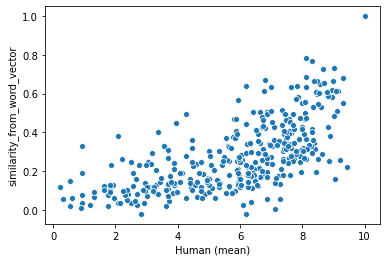

In [35]:
sns.scatterplot(df["Human (mean)"], df["similarity_from_word_vector"])
plt.show()

## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [43]:
# 国名の取得
# https://qiita.com/yamaru/items/822af1f7f77666381e20を参考にした。
countries = list()
with open('questions-words.txt') as f:
    for line in f:
        if "currency" in line:
            break
        if ":" in line:
            continue
        line = line.rstrip("\n")
        line = line.split(" ")
        countries.append(line[1])
        countries.append(line[3])
    countries = list(set(countries))

# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]
print(countries)

['Sudan', 'Georgia', 'Finland', 'Guinea', 'Bhutan', 'Slovakia', 'Botswana', 'Germany', 'Canada', 'Moldova', 'Jordan', 'Niger', 'Philippines', 'Cuba', 'Hungary', 'Mali', 'Zimbabwe', 'Somalia', 'Gabon', 'Serbia', 'Turkey', 'Liechtenstein', 'England', 'Egypt', 'Ghana', 'China', 'Malta', 'Nigeria', 'Tajikistan', 'Russia', 'Sweden', 'Denmark', 'Chile', 'Nicaragua', 'Uganda', 'Rwanda', 'Mozambique', 'Switzerland', 'Belize', 'Turkmenistan', 'Bahrain', 'Ecuador', 'Algeria', 'Armenia', 'Belgium', 'Burundi', 'Namibia', 'Liberia', 'Mauritania', 'Malawi', 'Guyana', 'Albania', 'Indonesia', 'Greece', 'Lithuania', 'Ukraine', 'Ireland', 'Azerbaijan', 'Slovenia', 'Suriname', 'Portugal', 'Japan', 'Dominica', 'Romania', 'Kyrgyzstan', 'Iraq', 'Peru', 'Oman', 'Fiji', 'Uzbekistan', 'Greenland', 'Bulgaria', 'Croatia', 'Syria', 'Bahamas', 'Spain', 'Australia', 'Afghanistan', 'Laos', 'Venezuela', 'Uruguay', 'Norway', 'Madagascar', 'Italy', 'Thailand', 'Latvia', 'Jamaica', 'Honduras', 'Libya', 'Zambia', 'France

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(countries_vec)
print(kmeans.labels_)

[0 1 2 0 3 1 0 2 2 1 2 0 4 4 1 0 0 0 0 1 1 2 2 3 0 3 1 0 3 1 2 2 4 4 0 0 0
 2 4 3 3 4 0 1 2 0 0 0 0 0 4 1 3 1 1 1 2 1 1 4 2 2 4 1 3 3 4 3 4 3 2 1 1 3
 4 2 2 3 3 4 4 2 0 2 3 1 4 4 3 0 2 1 0 0 1 0 1 2 3 3 1 4 3 0 3 3 3 3 2 1 1
 1 4 0 4 0]


In [45]:
def get_index_list(c_list, c):
    return [i for i, x in enumerate(c_list) if x == c]

get_index_list(kmeans.labels_, 0)

[0,
 3,
 6,
 11,
 15,
 16,
 17,
 18,
 24,
 27,
 34,
 35,
 36,
 42,
 45,
 46,
 47,
 48,
 49,
 82,
 89,
 92,
 93,
 95,
 103,
 113,
 115]

In [47]:
for i in range(5):
    print(f"Cluster {i}")
    country_index = get_index_list(kmeans.labels_, i)
    country_names = [countries[i] for i in country_index]
    seq = ", ".join(country_names)
    print(seq)
        

Cluster 0
Sudan, Guinea, Botswana, Niger, Mali, Zimbabwe, Somalia, Gabon, Ghana, Nigeria, Uganda, Rwanda, Mozambique, Algeria, Burundi, Namibia, Liberia, Mauritania, Malawi, Madagascar, Zambia, Eritrea, Angola, Gambia, Tunisia, Kenya, Senegal
Cluster 1
Georgia, Slovakia, Moldova, Hungary, Serbia, Turkey, Malta, Russia, Armenia, Albania, Greece, Lithuania, Ukraine, Azerbaijan, Slovenia, Romania, Bulgaria, Croatia, Latvia, Poland, Estonia, Kazakhstan, Belarus, Macedonia, Montenegro, Cyprus
Cluster 2
Finland, Germany, Canada, Jordan, Liechtenstein, England, Sweden, Denmark, Switzerland, Belgium, Ireland, Portugal, Japan, Greenland, Spain, Australia, Norway, Italy, France, Morocco, Austria
Cluster 3
Bhutan, Egypt, China, Tajikistan, Turkmenistan, Bahrain, Indonesia, Kyrgyzstan, Iraq, Oman, Uzbekistan, Syria, Afghanistan, Laos, Thailand, Libya, Nepal, Iran, Qatar, Bangladesh, Vietnam, Pakistan, Lebanon
Cluster 4
Philippines, Cuba, Chile, Nicaragua, Belize, Ecuador, Guyana, Suriname, Dominic

## 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

In [48]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [51]:
z = linkage(countries_vec, method="ward")

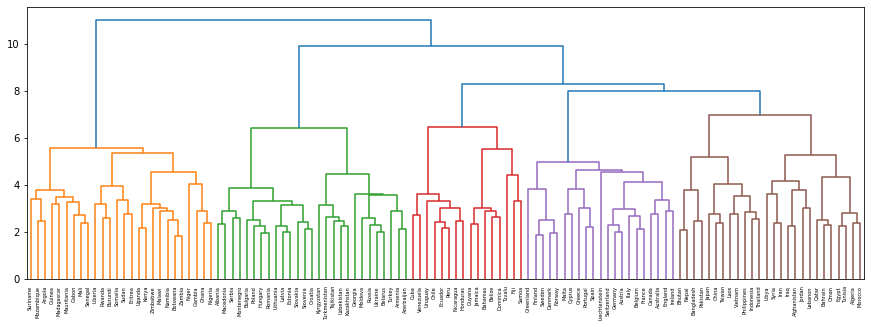

In [52]:
plt.figure(figsize=(15, 5))
dendrogram(z, labels=countries)
plt.show()

## 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

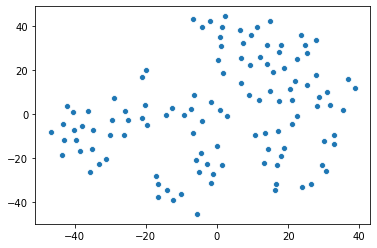

In [58]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state = 0, perplexity = 20, n_iter = 1000)
z = tsne.fit_transform(countries_vec)

sns.scatterplot(z[:, 0], z[:, 1])
plt.show()